##Equipe 2:
- Ana Carla Guerra
- Eduardo Amorim
- Gabriel Nóbrega
- Maria Carolina Berrafato
- Raissa Heiman

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.6 MB/s eta 0:00:00


In [ ]:
pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.7/160.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import optuna

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from torch.utils.data import TensorDataset, DataLoader
from sklearn import metrics
from scipy.stats import ks_2samp
from tqdm import tqdm

from tabpfn import TabPFNClassifier

# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/churn.csv')
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


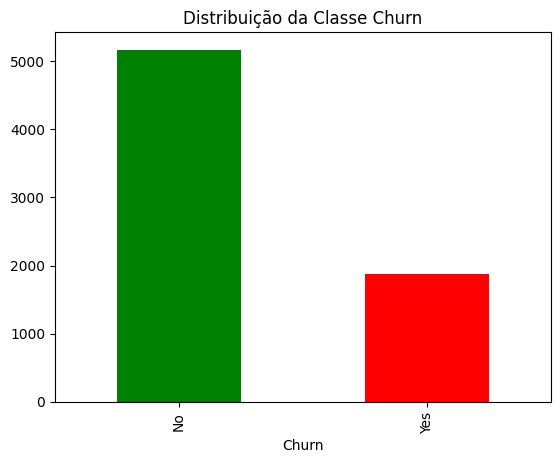

In [ ]:
data['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Distribuição da Classe Churn")
plt.show()

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


O dataset tem 20 classes e cada classe tem uma distribuição semelhante, o que mostra que esse conjunto de dados já é balanceado

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


É possível observar que apenas 4 variáveis são numéricas

Para checar os valores nulos, vamos somar os valores nulos encontrados e somá-los:

In [ ]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Temos que a coluna "TotalCharges" é a única que possui valores nulos, com 11 valores faltantes no total.

In [ ]:
duplicates = data[data.duplicated()]

print("Número de linhas duplicadas: ", len(duplicates))

Número de linhas duplicadas:  22


Além disso, temos 22 linhas com valores duplicados.


In [ ]:
data.drop_duplicates(inplace=True)

duplicates = data[data.duplicated()]

print("Número de linhas duplicadas após a remoção: ", len(duplicates))
data.info()

Número de linhas duplicadas após a remoção:  0
<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  

Após a remoção dos valores duplicados, a proporção de balanceamento do dataset é mantida.

Para os valores faltantes, vamos inputar novos dados usando a mediana para que a distribuição dos dados se mantenham próximos da distribuição original.

In [ ]:
data.fillna(data.median(numeric_only=True), inplace=True)


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2288.964517
std,0.368947,24.534965,30.069001,2265.315517
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


Mesmo após a inputação de novos valores, a média e a mediana se mantiveram para a coluna de Total Charges

Plotando gráficos para analisar a presença de outliers:

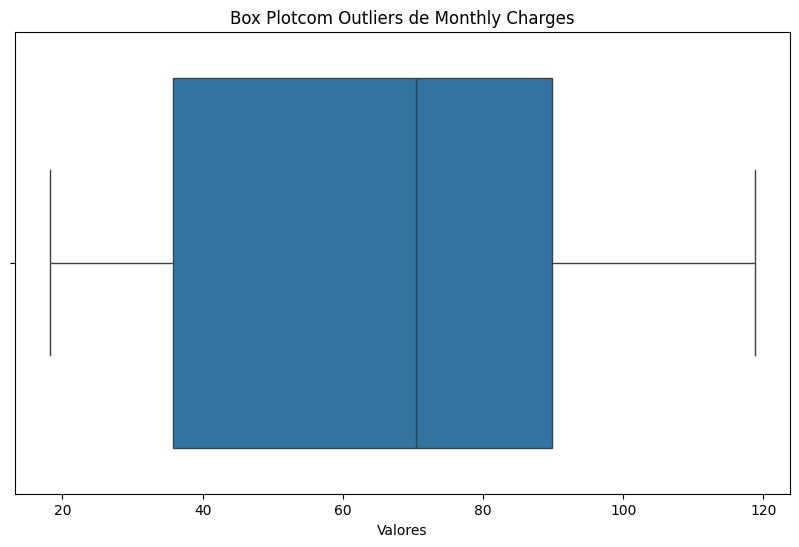

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['MonthlyCharges'])
plt.title('Box Plotcom Outliers de Monthly Charges')
plt.xlabel('Valores')
plt.show()

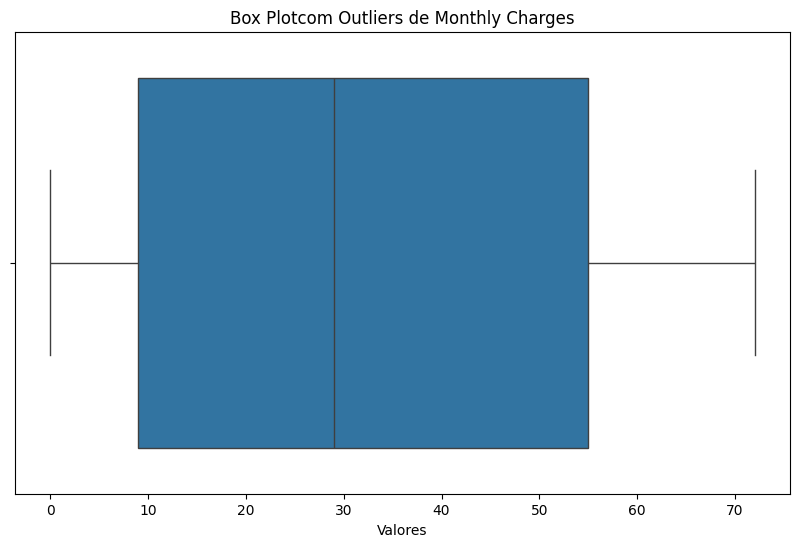

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['tenure'])
plt.title('Box Plotcom Outliers de Monthly Charges')
plt.xlabel('Valores')
plt.show()

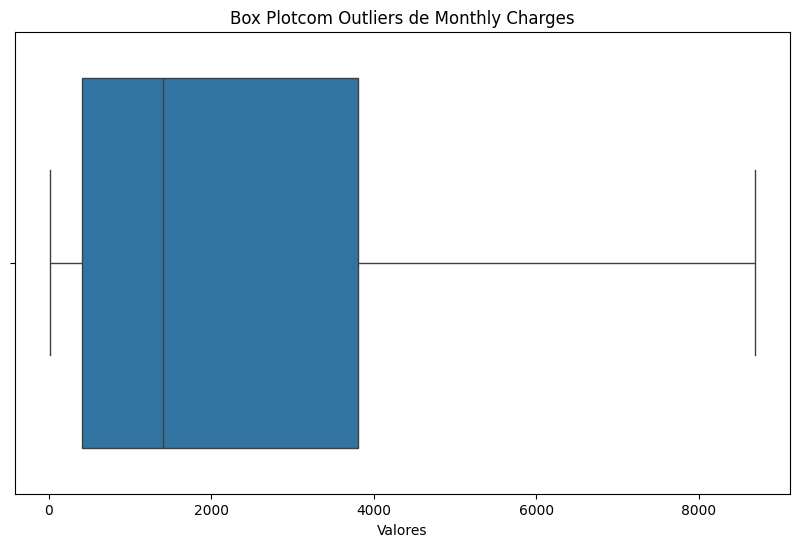

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['TotalCharges'])
plt.title('Box Plotcom Outliers de Monthly Charges')
plt.xlabel('Valores')
plt.show()

É possível observar que as colunas numéricas não possuem outliers.\
Para as variáveis categóricas vamos fazer o encoding:

# Pré-processamento

Vamos separar as variáveis categóricas e numéricas para aplicar a normalização, para as categóricas vamos aplicar One-Hot Encoding para poder processar os valores como uma coluna binária e StandartScaler para normalizar as variáveis numéricas.

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

cat_cols = [
    'gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Vamos separar a classe alvo da predição

In [ ]:
X = data.drop(columns='Churn')
y = data['Churn'].map({'No': 0, 'Yes': 1})

Vamos separar o conjunto de treino(50%), validação(25%) e teste(25%)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
print("\nTamanhos dos conjuntos:")
print(f"Treino: {X_train.shape[0]} | Validação: {X_val.shape[0]} | Teste: {X_test.shape[0]}")
print(f"Distribuição no treino: {y_train.value_counts().to_dict()}")
print(f"Distribuição na validação: {y_val.value_counts().to_dict()}")
print(f"Distribuição no teste: {y_test.value_counts().to_dict()}")

Criamos um objeto de pré-processamento para as variáveis que será aplicado para cada pipeline do modelo:

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder( handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Treinamento e Resultado dos Modelos

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    log_loss,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)
from scipy.stats import ks_2samp
from sklearn.model_selection import GridSearchCV, train_test_split

Resultados iniciais:

--- Métricas para Treino ---
MSE: 0.0197
Cross-Entropy (Log Loss): 0.1115
AUROC: 1.0000
KS Estatística: 0.9973 (p-valor: 0.0000)
Precisão: 0.9946
Recall: 0.9989
F1-Score: 0.9968
Matriz de Confusão:
[[2577    5]
 [   1  927]]


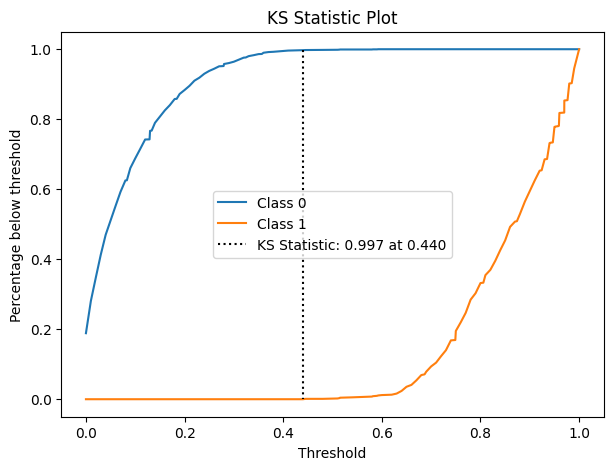


--- Métricas para Validação ---
MSE: 0.1543
Cross-Entropy (Log Loss): 0.5439
AUROC: 0.8153
KS Estatística: 0.5099 (p-valor: 0.0000)
Precisão: 0.5737
Recall: 0.5453
F1-Score: 0.5591
Matriz de Confusão:
[[1103  188]
 [ 211  253]]


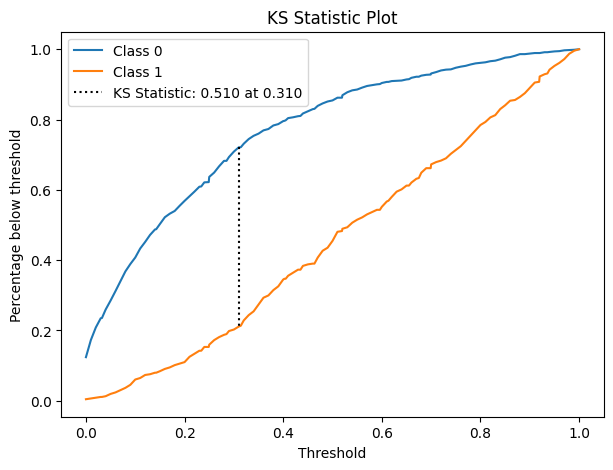

In [ ]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

def compute_metrics(model, X, y, dataset_name='dataset'):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)

    # MSE e Cross-Entropy (log loss)
    mse = mean_squared_error(y, y_probs)
    ce = log_loss(y, y_probs)

    # Matriz de confusão
    cm = confusion_matrix(y, y_pred)

    # AUROC
    auroc = roc_auc_score(y, y_probs)

    # Precision, Recall, F1
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Métrica KS
    probs_0 = y_probs[y == 0]
    probs_1 = y_probs[y == 1]
    ks_stat, ks_pvalue = ks_2samp(probs_0, probs_1)


    print(f"--- Métricas para {dataset_name} ---")
    print(f"MSE: {mse:.4f}")
    print(f"Cross-Entropy (Log Loss): {ce:.4f}")
    print(f"AUROC: {auroc:.4f}")
    print(f"KS Estatística: {ks_stat:.4f} (p-valor: {ks_pvalue:.4f})")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(cm)
    thresholds = np.sort(np.unique(np.concatenate([probs_0, probs_1])))

    pct_0 = [np.searchsorted(np.sort(probs_0), t, side='right') / len(probs_0) for t in thresholds]
    pct_1 = [np.searchsorted(np.sort(probs_1), t, side='right') / len(probs_1) for t in thresholds]

    diffs = np.abs(np.array(pct_0) - np.array(pct_1))
    ks_stat_plot = np.max(diffs)
    ks_threshold = thresholds[np.argmax(diffs)]

    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, pct_0, label='Class 0')
    plt.plot(thresholds, pct_1, label='Class 1')
    plt.vlines(ks_threshold, pct_0[np.argmax(diffs)], pct_1[np.argmax(diffs)],
               colors='k', linestyles='dotted',
               label=f'KS Statistic: {ks_stat_plot:.3f} at {ks_threshold:.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Percentage below threshold')
    plt.title('KS Statistic Plot')
    plt.legend()
    plt.show()
    print("")

    return {
        'mse': mse,
        'cross_entropy': ce,
        'auroc': auroc,
        'ks_stat': ks_stat,
        'ks_pvalue': ks_pvalue,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }

metrics_train = compute_metrics(pipeline, X_train, y_train, 'Treino')
metrics_val = compute_metrics(pipeline, X_val, y_val, 'Validação')


Tunagem com Grid Search:

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Melhores parâmetros: {'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 7, 'rf__n_estimators': 200}
Melhor AUROC no CV: 0.8352
AUROC no conjunto de validação: 0.7749
--- Métricas para Treino ---
MSE: 0.1115
Cross-Entropy (Log Loss): 0.3542
AUROC: 0.9215
KS Estatística: 0.7046 (p-valor: 0.0000)
Precisão: 0.6724
Recall: 0.8028
F1-Score: 0.7318
Matriz de Confusão:
[[2219  363]
 [ 183  745]]


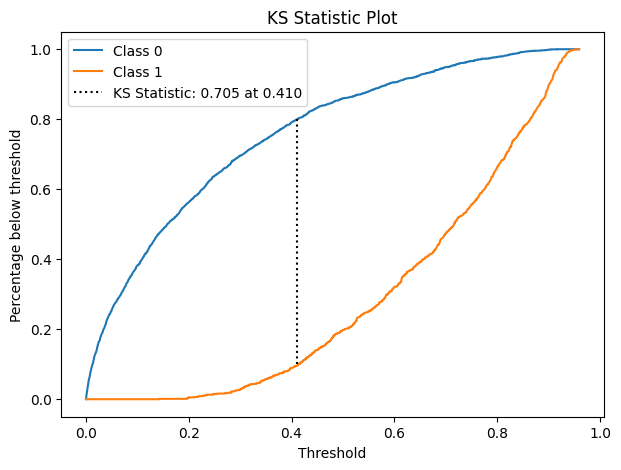


--- Métricas para Validação ---
MSE: 0.1520
Cross-Entropy (Log Loss): 0.4619
AUROC: 0.8381
KS Estatística: 0.5444 (p-valor: 0.0000)
Precisão: 0.5608
Recall: 0.6853
F1-Score: 0.6169
Matriz de Confusão:
[[1042  249]
 [ 146  318]]


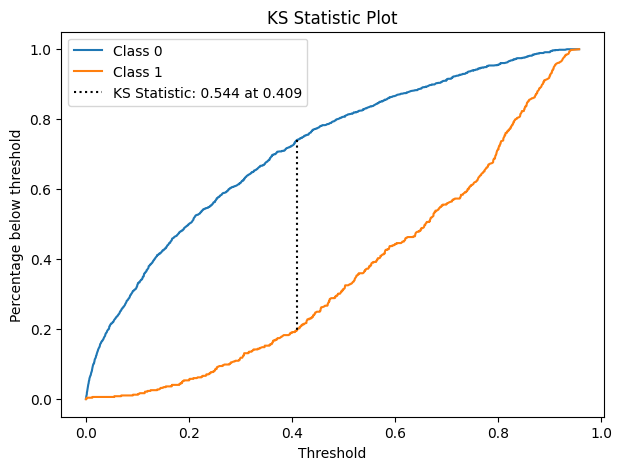

In [ ]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 7],
    'rf__min_samples_leaf': [1, 2, 3],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True
)


grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Melhor AUROC no CV: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

val_score = best_model.score(X_val, y_val)

print(f"AUROC no conjunto de validação: {val_score:.4f}")
print("==========================================")
metrics_train = compute_metrics(best_model, X_train, y_train, 'Treino')
metrics_val = compute_metrics(best_model, X_val, y_val, 'Validação')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores parâmetros: {'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 180}
Melhor AUROC no CV: 0.8372
AUROC no conjunto de validação: 0.7704
--- Métricas para Treino ---
MSE: 0.1297
Cross-Entropy (Log Loss): 0.4014
AUROC: 0.8930
KS Estatística: 0.6286 (p-valor: 0.0000)
Precisão: 0.6180
Recall: 0.7845
F1-Score: 0.6914
Matriz de Confusão:
[[2132  450]
 [ 200  728]]


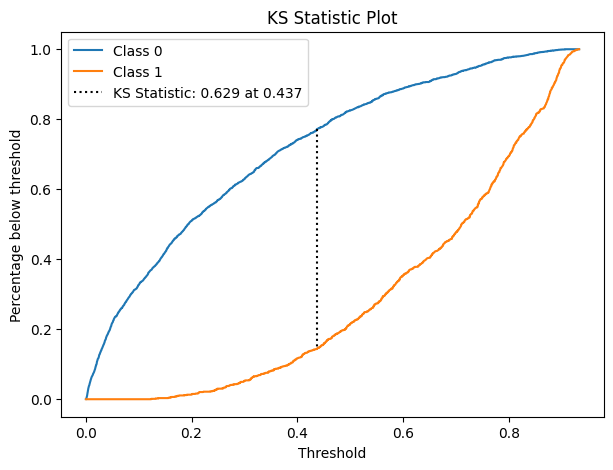


--- Métricas para Validação ---
MSE: 0.1556
Cross-Entropy (Log Loss): 0.4698
AUROC: 0.8391
KS Estatística: 0.5448 (p-valor: 0.0000)
Precisão: 0.5501
Recall: 0.7220
F1-Score: 0.6244
Matriz de Confusão:
[[1017  274]
 [ 129  335]]


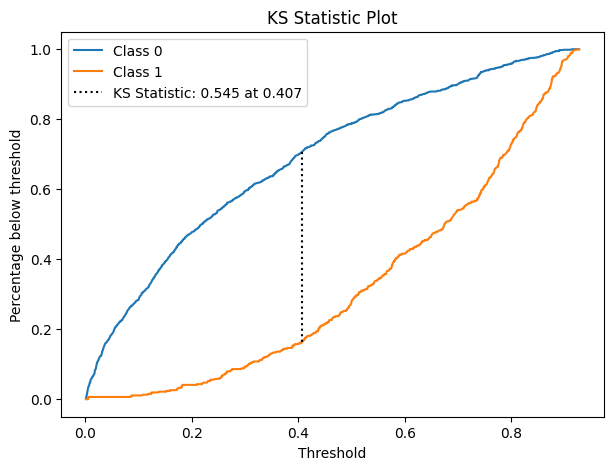

In [ ]:
# {'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 7, 'rf__n_estimators': 200}
param_grid_2 = {
    'rf__n_estimators': [180, 190, 200],
    'rf__max_depth': [None, 8, 9, 10],
    'rf__min_samples_split': [7, 8, 9],
    'rf__min_samples_leaf': [2, 3, 4],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
}

grid_search_2 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_2,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True
)

grid_search_2.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search_2.best_params_)
print(f"Melhor AUROC no CV: {grid_search_2.best_score_:.4f}")

best_model_2 = grid_search_2.best_estimator_

val_score = best_model_2.score(X_val, y_val)

print(f"AUROC no conjunto de validação: {val_score:.4f}")
print("==========================================")
metrics_train = compute_metrics(best_model_2, X_train, y_train, 'Treino')
metrics_val = compute_metrics(best_model_2, X_val, y_val, 'Validação')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhores parâmetros: {'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 180}
Melhor AUROC no CV: 0.8372
AUROC no conjunto de validação: 0.7704
--- Métricas para Treino ---
MSE: 0.1297
Cross-Entropy (Log Loss): 0.4014
AUROC: 0.8930
KS Estatística: 0.6286 (p-valor: 0.0000)
Precisão: 0.6180
Recall: 0.7845
F1-Score: 0.6914
Matriz de Confusão:
[[2132  450]
 [ 200  728]]


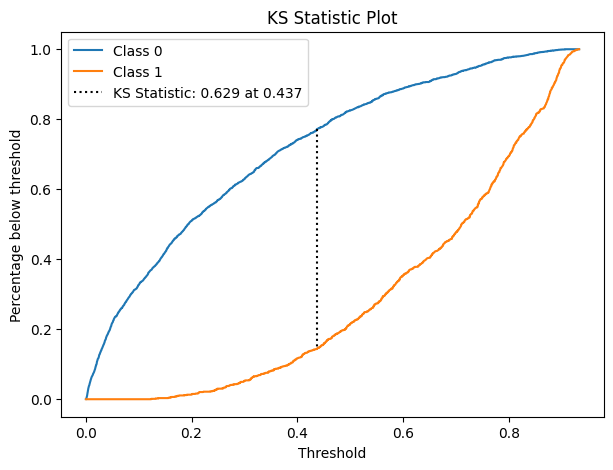


--- Métricas para Validação ---
MSE: 0.1556
Cross-Entropy (Log Loss): 0.4698
AUROC: 0.8391
KS Estatística: 0.5448 (p-valor: 0.0000)
Precisão: 0.5501
Recall: 0.7220
F1-Score: 0.6244
Matriz de Confusão:
[[1017  274]
 [ 129  335]]


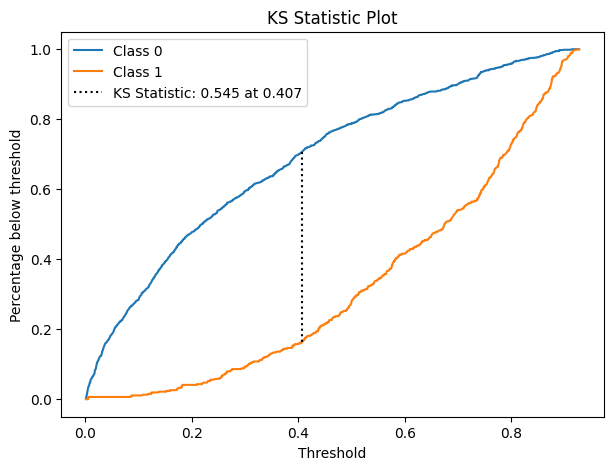

In [ ]:
# {'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 180}
param_grid_3 = {
    'rf__n_estimators': [160, 180, 190],
    'rf__max_depth': [None, 4, 6, 8],
    'rf__min_samples_split': [7, 8],
    'rf__min_samples_leaf': [ 3, 4],
    'rf__criterion': ['gini', 'entropy'],
}

# Criando o GridSearch com validação cruzada (cv=5)
grid_search_3 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_3,
    scoring='roc_auc',       # Métrica para otimizar (ex: AUROC)
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Rodar o grid search (apenas com dados de treino)
grid_search_3.fit(X_train, y_train)

# Melhor modelo e parâmetros encontrados
print("Melhores parâmetros:", grid_search_3.best_params_)
print(f"Melhor AUROC no CV: {grid_search_3.best_score_:.4f}")

# Avaliar no conjunto de validação e teste
best_model_3 = grid_search_3.best_estimator_

val_score = best_model_3.score(X_val, y_val)

print(f"AUROC no conjunto de validação: {val_score:.4f}")
print("==========================================")
metrics_train = compute_metrics(best_model_3, X_train, y_train, 'Treino')
metrics_val = compute_metrics(best_model_3, X_val, y_val, 'Validação')

Rodando no conjunto de testes a melhor configuração encontrada na tunagem:

Apesar dos testes 2 e 3 com grid search terem dado resultados praticamente iguais, vamos usar as configurações do 2:

In [ ]:
print("Melhor Configuração:")
print(grid_search_2.best_params_)

Melhor Configuração:
{'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 180}


Rodando o conjunto de teste na melhor configuração de treinamento:

--- Métricas para Teste ---
MSE: 0.1492
Cross-Entropy (Log Loss): 0.4497
AUROC: 0.8495
KS Estatística: 0.5357 (p-valor: 0.0000)
Precisão: 0.5631
Recall: 0.7290
F1-Score: 0.6354
Matriz de Confusão:
[[1028  263]
 [ 126  339]]


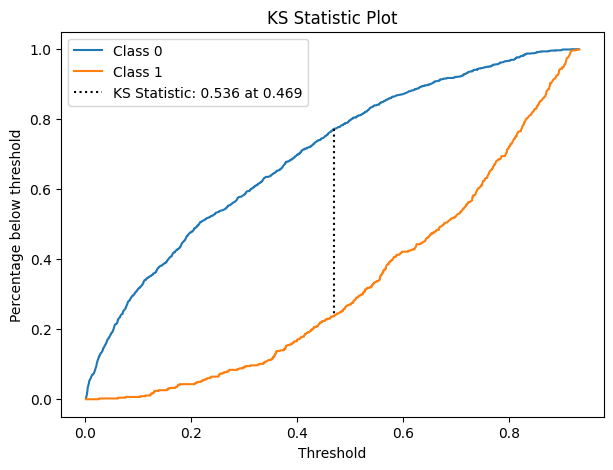

In [ ]:
metrics_test = compute_metrics(best_model_2, X_test, y_test, 'Teste')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support
from scipy.stats import ks_2samp

def plot_confusion_matrix(cm, classes, dataset_name='Dataset'):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Matriz de Confusão - {dataset_name}')
    plt.show()

def plot_roc_curve(y_true, y_probs, dataset_name='Dataset'):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {dataset_name}')
    plt.legend(loc='lower right')
    plt.show()

def plot_ks_curve(y_true, y_probs, dataset_name='Dataset'):
    probs_0 = y_probs[y_true == 0]
    probs_1 = y_probs[y_true == 1]

    # Thresholds combinados
    thresholds = np.sort(np.unique(np.concatenate([probs_0, probs_1])))

    # CDFs
    pct_0 = [np.searchsorted(np.sort(probs_0), t, side='right') / len(probs_0) for t in thresholds]
    pct_1 = [np.searchsorted(np.sort(probs_1), t, side='right') / len(probs_1) for t in thresholds]

    # KS Statistic
    diffs = np.abs(np.array(pct_0) - np.array(pct_1))
    ks_stat = np.max(diffs)
    ks_threshold = thresholds[np.argmax(diffs)]

    # Plot no formato desejado
    plt.figure(figsize=(7,5))
    plt.plot(thresholds, pct_0, label='Class 0', color='blue')
    plt.plot(thresholds, pct_1, label='Class 1', color='orange')
    plt.vlines(ks_threshold, pct_0[np.argmax(diffs)], pct_1[np.argmax(diffs)],
               colors='k', linestyles='dotted',
               label=f'KS Statistic: {ks_stat:.3f} at {ks_threshold:.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Percentage below threshold')
    plt.title(f'KS Statistic Plot - {dataset_name}')
    plt.legend()
    plt.show()

def print_classification_report(y_true, y_pred, dataset_name='Dataset'):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print(f"--- Métricas para {dataset_name} ---")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

def analyze_model_performance(model, X, y, dataset_name='Dataset'):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred)
    plot_confusion_matrix(cm, classes=['No Churn', 'Churn'], dataset_name=dataset_name)

    plot_roc_curve(y, y_probs, dataset_name=dataset_name)
    plot_ks_curve(y, y_probs, dataset_name=dataset_name)
    print_classification_report(y, y_pred, dataset_name=dataset_name)


Plotando os resultados da meelhro configuração em todos os conjuntos dos dados:

Resultados para o melhor modelo:
Resultados para o conjunto de Treino:


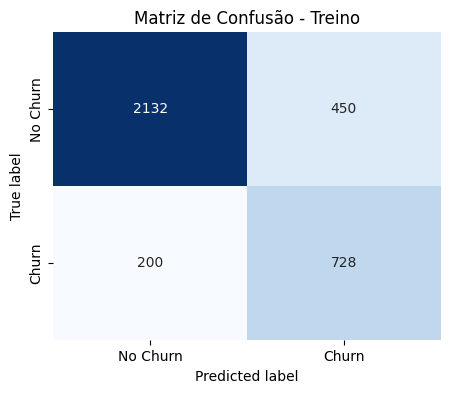

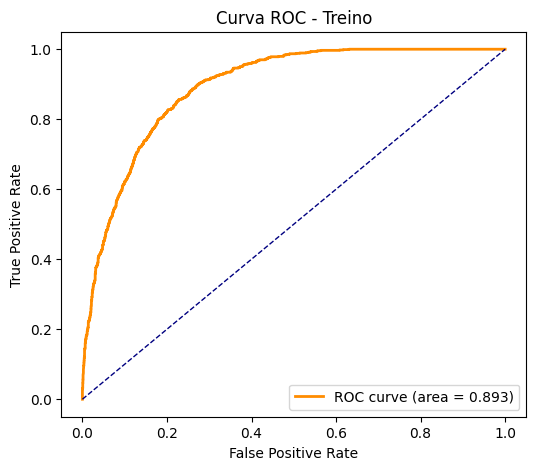

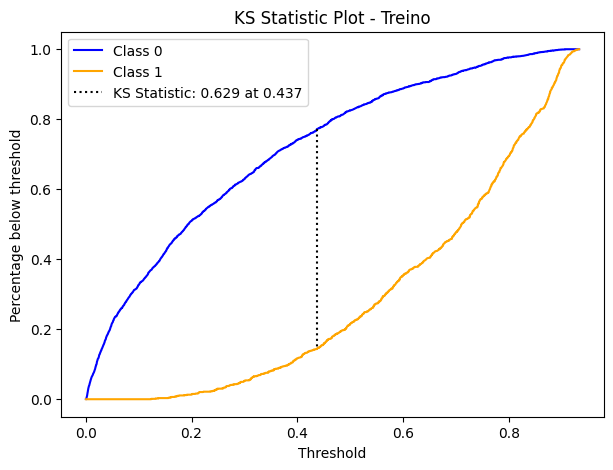

--- Métricas para Treino ---
Precisão: 0.6180
Recall: 0.7845
F1-Score: 0.6914

Resultados para o conjunto de Validação:


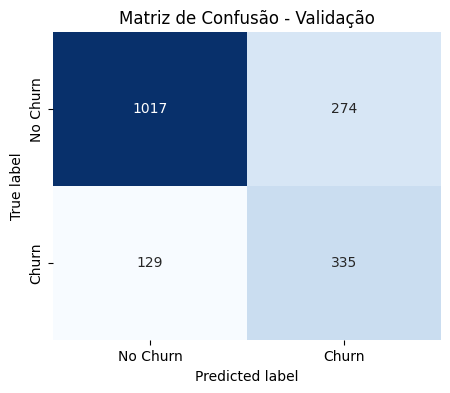

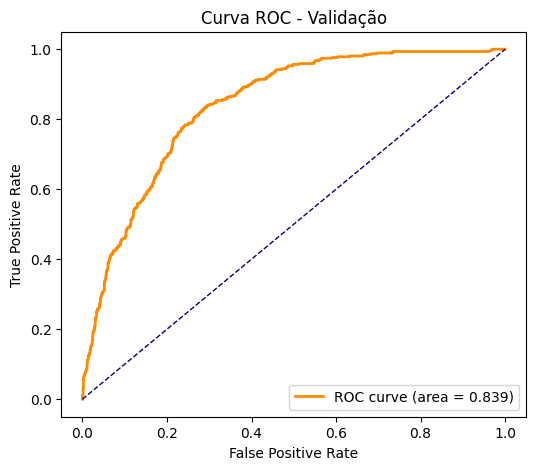

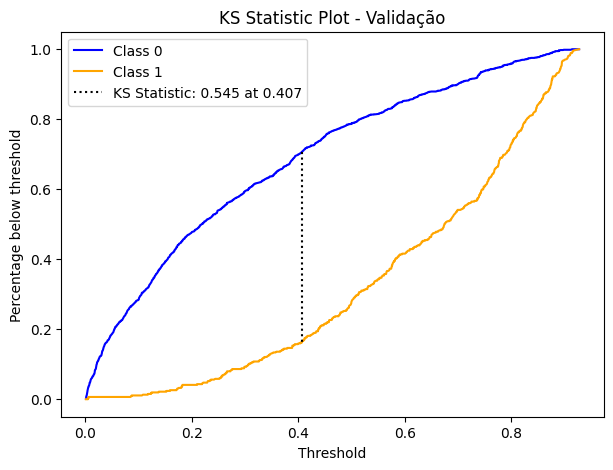

--- Métricas para Validação ---
Precisão: 0.5501
Recall: 0.7220
F1-Score: 0.6244

Resultados para o conjunto de Teste:


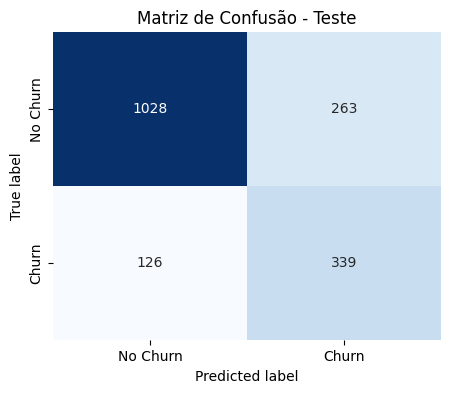

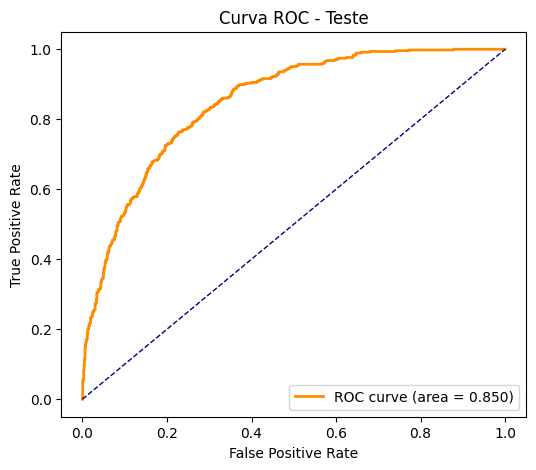

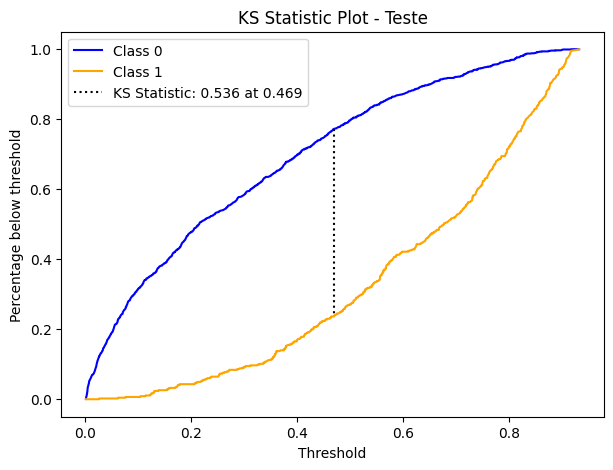

--- Métricas para Teste ---
Precisão: 0.5631
Recall: 0.7290
F1-Score: 0.6354



In [ ]:
print("Resultados para o melhor modelo:")
print("Resultados para o conjunto de Treino:")
analyze_model_performance(best_model_2, X_train, y_train, 'Treino')
print("Resultados para o conjunto de Validação:")
analyze_model_performance(best_model_2, X_val, y_val, 'Validação')
print("Resultados para o conjunto de Teste:")
analyze_model_performance(best_model_2, X_test, y_test, 'Teste')

## MLP

In [ ]:
# Hiperparametros

# Valores para ser sobrescritos pelo Optuna depois
learning_rate = 0.001
batch_size = 32
num_epochs = 50
patience = 5
dropout_rate = 0.3
hidden_layers = [64, 128, 64]

In [ ]:
# Pré-processamento e SMOTE
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

if hasattr(X_train_proc, "toarray"):
    X_train_proc = X_train_proc.toarray()
    X_val_proc = X_val_proc.toarray()
    X_test_proc = X_test_proc.toarray()

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_proc, y_train)

# Tensores
X_train_tensor = torch.tensor(X_train_bal, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bal.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_proc, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_proc, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Modelo dinâmico
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, dropout_rate):
        super(MLP, self).__init__()
        layers = []
        in_features = input_size
        for h in hidden_layers:
            layers.append(nn.Linear(in_features, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            in_features = h
        layers.append(nn.Linear(in_features, 1))
        layers.append(nn.Sigmoid())
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

input_size = X_train_tensor.shape[1]

In [ ]:
def objective(trial):
    # Hiperparâmetros sugeridos pelo Optuna
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
    n_layers = trial.suggest_int("n_layers", 1, 4)
    hidden_layers = [trial.suggest_int(f"n_units_l{i}", 16, 256, step=16) for i in range(n_layers)]

    # DataLoaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Modelo
    model = MLP(input_size, hidden_layers, dropout_rate).cuda()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Treinamento rápido com early stopping
    best_val_auc = 0
    best_val_loss = float('inf')
    patience_counter = 0
    patience = 5
    num_epochs = 50

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.cuda(), y_batch.cuda().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validação
        model.eval()
        all_probs, all_labels = [], []
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.cuda(), y_batch.cuda().unsqueeze(1)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                probs = outputs.cpu().numpy().flatten()
                all_probs.extend(probs)
                all_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader)
        val_auc = metrics.roc_auc_score(all_labels, all_probs)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_auc = val_auc
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    return best_val_auc

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Melhores hiperparâmetros encontrados:")
print(study.best_params)
print(f"Melhor AUC: {study.best_value:.4f}")

# Atualiza hiperparâmetros globais
learning_rate = study.best_params["learning_rate"]
batch_size = study.best_params["batch_size"]
dropout_rate = study.best_params["dropout_rate"]
hidden_layers = [study.best_params[f"n_units_l{i}"] for i in range(study.best_params["n_layers"])]

[I 2025-08-10 21:22:26,973] A new study created in memory with name: no-name-81dbdcef-ecc1-430c-a308-e819b5d3831c
/tmp/ipython-input-3119001704.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipython-input-3119001704.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
[I 2025-08-10 21:22:30,622] Trial 0 finished with value: 0.8339832794679345 and parameters: {'learning_rate': 0.0006281116746765728, 'batch_size': 32, 'dropout_rate': 0.49034005140910564, 'n_layers': 2, 'n_units_l0': 240, 'n_units_l1': 128}. Best is trial 0 with value: 0.8339832794679

Melhores hiperparâmetros encontrados:
{'learning_rate': 0.000111243189947198, 'batch_size': 128, 'dropout_rate': 0.18289494592356198, 'n_layers': 1, 'n_units_l0': 240}
Melhor AUC: 0.8400


In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = MLP(input_size, hidden_layers, dropout_rate).cuda()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_val_loss = float('inf')
patience_counter = 0
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.cuda(), y_batch.cuda().unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.cuda(), y_batch.cuda().unsqueeze(1)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_mlp.pth")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

model.load_state_dict(torch.load("best_mlp.pth"))

Epoch [1/50] Train Loss: 0.6784 | Val Loss: 0.6535
Epoch [2/50] Train Loss: 0.6317 | Val Loss: 0.6179
Epoch [3/50] Train Loss: 0.5920 | Val Loss: 0.5898
Epoch [4/50] Train Loss: 0.5619 | Val Loss: 0.5615
Epoch [5/50] Train Loss: 0.5378 | Val Loss: 0.5444
Epoch [6/50] Train Loss: 0.5228 | Val Loss: 0.5302
Epoch [7/50] Train Loss: 0.5130 | Val Loss: 0.5206
Epoch [8/50] Train Loss: 0.5072 | Val Loss: 0.5194
Epoch [9/50] Train Loss: 0.5021 | Val Loss: 0.5136
Epoch [10/50] Train Loss: 0.4966 | Val Loss: 0.5079
Epoch [11/50] Train Loss: 0.4935 | Val Loss: 0.5098
Epoch [12/50] Train Loss: 0.4928 | Val Loss: 0.5110
Epoch [13/50] Train Loss: 0.4894 | Val Loss: 0.5075
Epoch [14/50] Train Loss: 0.4881 | Val Loss: 0.5066
Epoch [15/50] Train Loss: 0.4867 | Val Loss: 0.5062
Epoch [16/50] Train Loss: 0.4843 | Val Loss: 0.5016
Epoch [17/50] Train Loss: 0.4834 | Val Loss: 0.5082
Epoch [18/50] Train Loss: 0.4815 | Val Loss: 0.5003
Epoch [19/50] Train Loss: 0.4800 | Val Loss: 0.5078
Epoch [20/50] Train L

<All keys matched successfully>

--- Train ---
Accuracy: 0.7730
Precision: 0.7654
Recall: 0.7874
F1 Score: 0.7763
AUC: 0.8508
KS Statistic: 0.5480 (p-value: 0.0000)
[[1959  623]
 [ 549 2033]]


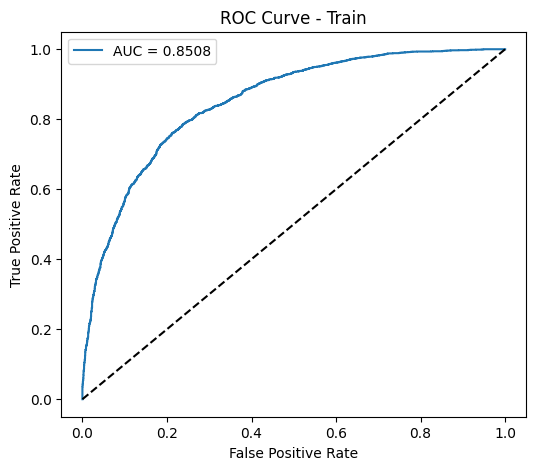

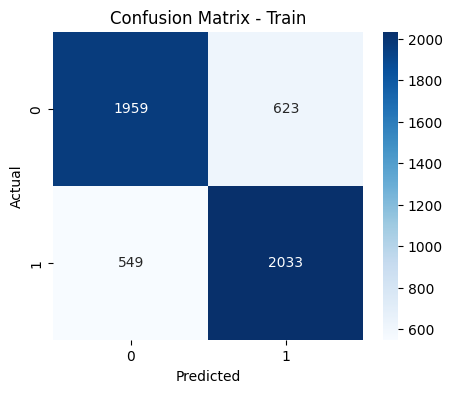

--- Validation ---
Accuracy: 0.7516
Precision: 0.5203
Recall: 0.7716
F1 Score: 0.6215
AUC: 0.8392
KS Statistic: 0.5319 (p-value: 0.0000)
[[961 330]
 [106 358]]


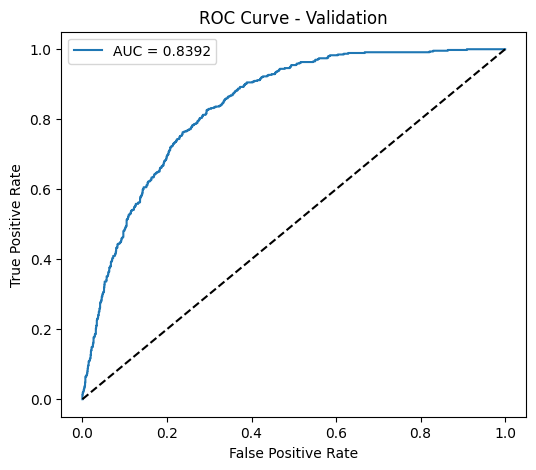

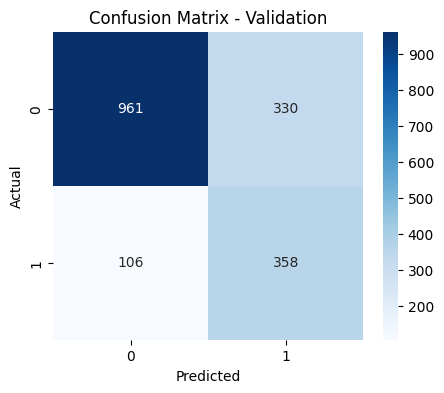

--- Test ---
Accuracy: 0.7580
Precision: 0.5298
Recall: 0.7656
F1 Score: 0.6262
AUC: 0.8521
KS Statistic: 0.5376 (p-value: 0.0000)
[[975 316]
 [109 356]]


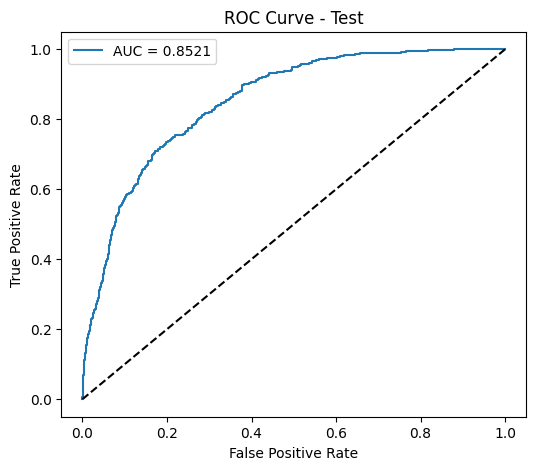

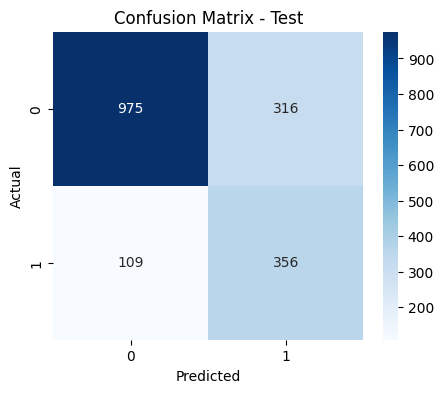

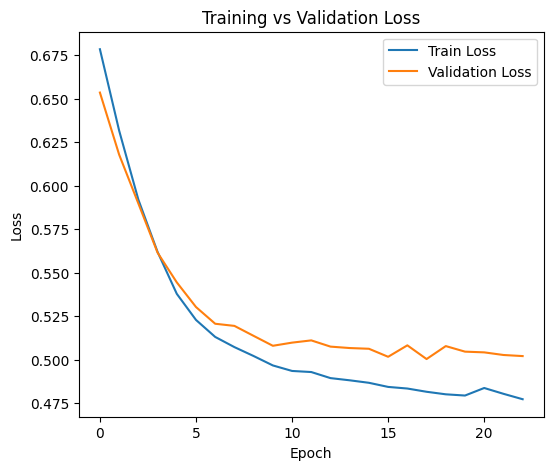

In [ ]:
def evaluate_model(model, loader, dataset_name):
    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.cuda()
            outputs = model(X_batch)
            probs = outputs.cpu().numpy().flatten()
            preds = (probs > 0.5).astype(int)
            all_preds.extend(preds)
            all_labels.extend(y_batch.numpy())
            all_probs.extend(probs)

    acc = metrics.accuracy_score(all_labels, all_preds)
    prec = metrics.precision_score(all_labels, all_preds)
    rec = metrics.recall_score(all_labels, all_preds)
    f1 = metrics.f1_score(all_labels, all_preds)
    auc = metrics.roc_auc_score(all_labels, all_probs)

    probs_0 = [p for p, l in zip(all_probs, all_labels) if l == 0]
    probs_1 = [p for p, l in zip(all_probs, all_labels) if l == 1]
    ks_stat, ks_pvalue = ks_2samp(probs_0, probs_1)

    print(f"--- {dataset_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"KS Statistic: {ks_stat:.4f} (p-value: {ks_pvalue:.4f})")
    print(metrics.confusion_matrix(all_labels, all_preds))

    fpr, tpr, _ = metrics.roc_curve(all_labels, all_probs)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {dataset_name}")
    plt.legend()
    plt.show()

    cm = metrics.confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Avaliação
evaluate_model(model, train_loader, "Train")
evaluate_model(model, val_loader, "Validation")
evaluate_model(model, test_loader, "Test")

# Curva de perda
plt.figure(figsize=(6, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Exemplo pra rodar
from sklearn.ensemble import LogisticRegression

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Treinamento
pipeline.fit(X_train, y_train)

# Acurácia na validação e teste
val_acc = pipeline.score(X_val, y_val)
test_acc = pipeline.score(X_test, y_test)

print(f"Acurácia na validação: {val_acc:.4f}")
print(f"Acurácia no teste: {test_acc:.4f}")

In [ ]:
# Ver a distribuição da classe preditiva após o SMOTE
data['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Distribuição da Classe Churn")
plt.show()

## STab - Transformer para dados tabulares

In [ ]:
# STab (PyTorch)
import os, math, json, random, time
from dataclasses import dataclass
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_fscore_support,
    confusion_matrix, classification_report
)
from sklearn.utils.class_weight import compute_class_weight

# Reprodutibilidade
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
# Métricas úteis (KS, etc.)

def ks_statistic(y_true, y_proba):
    # KS = max_t |TPR(t) - FPR(t)|
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    ks = np.max(np.abs(tpr - fpr))
    best_thr = thr[np.argmax(np.abs(tpr - fpr))]
    return ks, float(best_thr)

def compute_metrics(y_true, y_proba, threshold=0.5):
    auroc = roc_auc_score(y_true, y_proba)
    ks, ks_thr = ks_statistic(y_true, y_proba)
    y_pred = (y_proba >= threshold).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    return {
        "AUROC": auroc,
        "KS": ks,
        "KS_thr": ks_thr,
        "Precision@thr": prec,
        "Recall@thr": rec,
        "F1@thr": f1,
        "ConfusionMatrix": cm
    }

In [ ]:
# Detectar X/y e criar validação se faltar

def _as_dataframe(X, name_prefix="f"):
    # Converte np.array -> DataFrame com nomes f0..fN
    if isinstance(X, pd.DataFrame):
        return X.copy()
    X = np.asarray(X)
    return pd.DataFrame(X, columns=[f"{name_prefix}{i}" for i in range(X.shape[1])])

g = globals()
assert "X_train" in g and "y_train" in g and "X_test" in g and "y_test" in g, \
    "Certifique-se de ter X_train, y_train, X_test, y_test definidos antes destas células."

X_train_df = _as_dataframe(g["X_train"], name_prefix="tr_")
X_test_df  = _as_dataframe(g["X_test"],  name_prefix="te_")
y_train_np = np.asarray(g["y_train"]).reshape(-1)
y_test_np  = np.asarray(g["y_test"]).reshape(-1)

if "X_val" in g and "y_val" in g:
    X_val_df = _as_dataframe(g["X_val"], name_prefix="va_")
    y_val_np = np.asarray(g["y_val"]).reshape(-1)
else:
    X_train_df, X_val_df, y_train_np, y_val_np = train_test_split(
        X_train_df, y_train_np, test_size=0.2, random_state=42, stratify=y_train_np
    )

# Descobrir colunas categóricas (objetos/categoria) e numéricas

def split_num_cat(df: pd.DataFrame):
    cat_cols = [c for c in df.columns if str(df[c].dtype) in ("object", "category")]
    num_cols = [c for c in df.columns if c not in cat_cols]
    return num_cols, cat_cols

num_cols, cat_cols = split_num_cat(X_train_df)
print(f"Numéricas: {len(num_cols)} | Categóricas: {len(cat_cols)}")

Numéricas: 3 | Categóricas: 16


In [ ]:
# Tokenizador de features (fit no treino, aplica no val/test)
# - Numéricas: StandardScaler (fit no treino) + proj. 1->d_model + embedding de identidade de coluna
# - Categóricas: mapeia string->índice por coluna e usa Embedding(card, d_model)

class FeatureTokenizer:
    def __init__(self, num_cols, cat_cols):
        self.num_cols = list(num_cols)
        self.cat_cols = list(cat_cols)
        self.scaler = StandardScaler() if len(self.num_cols) > 0 else None
        self.cat_maps = {}
        self.cat_cardinalities = []

    def fit(self, df: pd.DataFrame):
        if self.scaler is not None and len(self.num_cols) > 0:
            self.scaler.fit(df[self.num_cols])
        for c in self.cat_cols:
            # ordem determinística: valores + UNK no final
            uniques = pd.Series(df[c].astype("category").cat.categories).tolist()
            mapping = {v:i for i, v in enumerate(uniques)}
            mapping["<UNK>"] = len(mapping)
            self.cat_maps[c] = mapping
        self.cat_cardinalities = [len(self.cat_maps[c]) for c in self.cat_cols]
        return self

    def transform(self, df: pd.DataFrame):
        # Numéricas -> ndarray float32 [N, n_num]
        if self.scaler is not None and len(self.num_cols) > 0:
            X_num = self.scaler.transform(df[self.num_cols]).astype(np.float32)
        else:
            X_num = np.zeros((len(df), 0), dtype=np.float32)

        # Categóricas -> ndarray long [N, n_cat]
        X_cat = None
        if len(self.cat_cols) > 0:
            mats = []
            for c in self.cat_cols:
                m = self.cat_maps[c]
                idxs = [m.get(v, m["<UNK>"]) for v in df[c].tolist()]
                mats.append(np.asarray(idxs, dtype=np.int64).reshape(-1, 1))
            X_cat = np.concatenate(mats, axis=1)
        else:
            X_cat = np.zeros((len(df), 0), dtype=np.int64)
        return X_num, X_cat

tokenizer = FeatureTokenizer(num_cols, cat_cols).fit(X_train_df)

Xtr_num, Xtr_cat = tokenizer.transform(X_train_df)
Xva_num, Xva_cat = tokenizer.transform(X_val_df)
Xte_num, Xte_cat = tokenizer.transform(X_test_df)

ytr = y_train_np.astype(np.int64)
yva = y_val_np.astype(np.int64)
yte = y_test_np.astype(np.int64)

n_num = Xtr_num.shape[1]
n_cat = Xtr_cat.shape[1]
cat_cards = tokenizer.cat_cardinalities
print(f"n_num={n_num}, n_cat={n_cat}, cat_cards={cat_cards[:5]}{'...' if len(cat_cards)>5 else ''}")

n_num=3, n_cat=16, cat_cards=[3, 3, 3, 3, 3]...


In [ ]:
# Dataset e DataLoaders

class TabDataset(Dataset):
    def __init__(self, X_num, X_cat, y):
        self.X_num = X_num
        self.X_cat = X_cat
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        xn = self.X_num[idx]
        xc = self.X_cat[idx]
        yy = self.y[idx]
        return xn, xc, yy

batch_size = 256

train_ds = TabDataset(Xtr_num, Xtr_cat, ytr)
val_ds   = TabDataset(Xva_num, Xva_cat, yva)
test_ds  = TabDataset(Xte_num, Xte_cat, yte)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
val_dl   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, drop_last=False)
test_dl  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, drop_last=False)

In [ ]:
# Blocos Transformer e STab
# Estratégia:
#   - Para cada coluna numérica: projeta valor com Linear(1->d_model) compartilhado + embedding de identidade da coluna
#   - Para cada coluna categórica: Embedding(card, d_model)
#   - Concatena todos tokens + [CLS] (parâmetro aprendido)
#   - Encoder Transformer -> head MLP em cima do [CLS]

class STab(nn.Module):
    def __init__(
        self,
        n_num: int,
        cat_cardinalities: list,
        d_model: int = 128,
        n_heads: int = 4,
        n_layers: int = 4,
        dropout: float = 0.1,
        mlp_hidden: int = 128
    ):
        super().__init__()
        self.n_num = n_num
        self.n_cat = len(cat_cardinalities)
        self.d_model = d_model

        # Numéricas: projeção compartilhada + embedding de identidade por coluna
        if n_num > 0:
            self.num_linear = nn.Linear(1, d_model)
            self.num_col_emb = nn.Embedding(n_num, d_model)
        else:
            self.num_linear = None
            self.num_col_emb = None

        # Categóricas: uma embedding por coluna
        self.cat_embs = nn.ModuleList([
            nn.Embedding(card, d_model) for card in cat_cardinalities
        ])

        # Token [CLS]
        self.cls_token = nn.Parameter(torch.randn(1, 1, d_model) * 0.02)

        # Transformer Encoder
        enc_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=n_heads, dim_feedforward=d_model*4,
            dropout=dropout, batch_first=True, activation="gelu", norm_first=True
        )
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers=n_layers)

        self.dropout = nn.Dropout(dropout)
        self.head = nn.Sequential(
            nn.Linear(d_model, mlp_hidden),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_hidden, 1)
        )
        self._init_weights()

    def _init_weights(self):
        if self.num_linear is not None:
            nn.init.xavier_uniform_(self.num_linear.weight)
            nn.init.zeros_(self.num_linear.bias)
        for emb in self.cat_embs:
            nn.init.normal_(emb.weight, std=0.02)
        nn.init.normal_(self.cls_token, std=0.02)
        for m in self.head:
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x_num: torch.Tensor, x_cat: torch.Tensor):
        B = x_num.shape[0] if x_num is not None else x_cat.shape[0]
        tokens = []

        # Num tokens
        if self.n_num > 0:
            # x_num: [B, n_num] -> lista de [B, 1] por coluna
            # aplica linear compartilhada e soma embedding de identidade da coluna
            idxs = torch.arange(self.n_num, device=x_num.device).unsqueeze(0).expand(B, -1)  # [B, n_num]
            num_proj = self.num_linear(x_num.unsqueeze(-1))            # [B, n_num, d_model]
            num_id = self.num_col_emb(idxs)                            # [B, n_num, d_model]
            num_tok = num_proj + num_id                                 # [B, n_num, d_model]
            tokens.append(num_tok)

        # Cat tokens
        if self.n_cat > 0:
            cat_tok_list = []
            for j, emb in enumerate(self.cat_embs):
                col_j = x_cat[:, j]                                     # [B]
                cat_tok_list.append(emb(col_j).unsqueeze(1))            # [B,1,d_model]
            cat_tok = torch.cat(cat_tok_list, dim=1)                    # [B, n_cat, d_model]
            tokens.append(cat_tok)

        if len(tokens) > 0:
            x = torch.cat(tokens, dim=1)                                # [B, n_tokens, d_model]
        else:
            raise ValueError("Sem tokens! Verifique se há colunas numéricas e/ou categóricas.")

        # Prefixa [CLS]
        cls = self.cls_token.expand(B, -1, -1)                          # [B,1,d_model]
        x = torch.cat([cls, x], dim=1)                                  # [B, 1+n_tokens, d_model]

        # Transformer
        x = self.encoder(x)                                             # [B, 1+n_tokens, d_model]
        cls_h = x[:, 0, :]                                              # [B, d_model]
        cls_h = self.dropout(cls_h)
        logit = self.head(cls_h).squeeze(1)                             # [B]
        return logit

In [ ]:
# HOTFIX — DataLoader já retorna Tensor

import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score

def _to_tensor(x, dtype=None, device=None):
    if isinstance(x, torch.Tensor):
        t = x
    elif isinstance(x, np.ndarray):
        t = torch.from_numpy(x)
    else:
        t = torch.tensor(x)
    if dtype is not None:
        t = t.to(dtype)
    if device is not None:
        t = t.to(device)
    return t

def predict_proba(model, dl):
    model.eval()
    preds, ys = [], []
    with torch.no_grad():
        for xnum, xcat, y in dl:
            xnum = _to_tensor(xnum, torch.float32, device)
            xcat = _to_tensor(xcat, torch.long, device)
            y    = _to_tensor(y,    torch.float32, device)
            prob = torch.sigmoid(model(xnum, xcat))
            preds.append(prob.detach().cpu().numpy())
            ys.append(y.detach().cpu().numpy())
    return np.concatenate(preds), np.concatenate(ys)

def train_and_eval(train_dl, val_dl, test_dl, n_num, cat_cards, cfg):
    model = STab(
        n_num=n_num,
        cat_cardinalities=cat_cards,
        d_model=cfg.d_model,
        n_heads=cfg.n_heads,
        n_layers=cfg.n_layers,
        dropout=cfg.dropout,
        mlp_hidden=cfg.mlp_hidden
    ).to(device)

    y_np = train_dl.dataset.y
    n_pos = (y_np == 1).sum()
    n_neg = (y_np == 0).sum()
    pos_weight = torch.tensor(max(n_neg / max(n_pos, 1), 1.0), dtype=torch.float32, device=device)

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optim = torch.optim.AdamW(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=max(cfg.max_epochs, 10))

    best_val = -np.inf
    best_state = None
    epochs_no_improve = 0

    for epoch in range(1, cfg.max_epochs + 1):
        model.train()
        total_loss = 0.0
        for xnum, xcat, y in train_dl:
            xnum = _to_tensor(xnum, torch.float32, device)
            xcat = _to_tensor(xcat, torch.long,    device)
            y    = _to_tensor(y,    torch.float32, device)

            logits = model(xnum, xcat)
            loss = criterion(logits, y)

            optim.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
            optim.step()
            total_loss += loss.item() * xnum.size(0)
        scheduler.step()

        # Validação (AUROC para early stopping)
        val_proba, val_y = predict_proba(model, val_dl)
        val_auroc = roc_auc_score(val_y, val_proba)
        print(f"Epoch {epoch:03d} | train_loss={total_loss/len(train_dl.dataset):.5f} | val_AUROC={val_auroc:.4f}")

        if val_auroc > best_val + 1e-4:
            best_val = val_auroc
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= cfg.patience:
                print(f"Early stopping (sem melhora por {cfg.patience} épocas).")
                break

    if best_state is not None:
        model.load_state_dict(best_state)

    # Avaliação final com threshold pelo KS na validação
    val_proba, val_y = predict_proba(model, val_dl)
    test_proba, test_y = predict_proba(model, test_dl)

    ks, ks_thr = ks_statistic(val_y, val_proba)
    metrics_val  = compute_metrics(val_y,  val_proba,  threshold=ks_thr)
    metrics_test = compute_metrics(test_y, test_proba, threshold=ks_thr)

    print("\n=== Validação (threshold pelo KS da validação) ===")
    for k, v in metrics_val.items():
        if k != "ConfusionMatrix":
            print(f"{k}: {v}")
    print("Confusion Matrix:\n", metrics_val["ConfusionMatrix"])

    print("\n=== Teste (mesmo threshold) ===")
    for k, v in metrics_test.items():
        if k != "ConfusionMatrix":
            print(f"{k}: {v}")
    print("Confusion Matrix:\n", metrics_test["ConfusionMatrix"])

    return model, {"val": metrics_val, "test": metrics_test, "thr": ks_thr}, (val_proba, val_y, test_proba, test_y)

In [ ]:
@dataclass
class TrainConfig:
    d_model: int = 128
    n_heads: int = 4
    n_layers: int = 4
    dropout: float = 0.1
    mlp_hidden: int = 128
    lr: float = 1e-4
    weight_decay: float = 1e-4
    max_epochs: int = 50
    patience: int = 10

cfg = TrainConfig()

In [ ]:
model, report, raw_preds = train_and_eval(train_dl, val_dl, test_dl, n_num, cat_cards, cfg)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=0.85633 | val_AUROC=0.8126
Epoch 002 | train_loss=0.79460 | val_AUROC=0.8255
Epoch 003 | train_loss=0.78506 | val_AUROC=0.8263
Epoch 004 | train_loss=0.76489 | val_AUROC=0.8248
Epoch 005 | train_loss=0.76351 | val_AUROC=0.8272
Epoch 006 | train_loss=0.74280 | val_AUROC=0.8265
Epoch 007 | train_loss=0.73885 | val_AUROC=0.8298
Epoch 008 | train_loss=0.74082 | val_AUROC=0.8275
Epoch 009 | train_loss=0.73070 | val_AUROC=0.8254
Epoch 010 | train_loss=0.72681 | val_AUROC=0.8282
Epoch 011 | train_loss=0.70702 | val_AUROC=0.8256
Epoch 012 | train_loss=0.70484 | val_AUROC=0.8268
Epoch 013 | train_loss=0.71568 | val_AUROC=0.8268
Epoch 014 | train_loss=0.71439 | val_AUROC=0.8220
Epoch 015 | train_loss=0.70972 | val_AUROC=0.8200
Epoch 016 | train_loss=0.69758 | val_AUROC=0.8205
Epoch 017 | train_loss=0.69712 | val_AUROC=0.8233
Early stopping (sem melhora por 10 épocas).

=== Validação (threshold pelo KS da validação) ===
AUROC: 0.8298465503886321
KS: 0.5305163065252811
KS_th

In [ ]:
# Relatório textual + salvar checkpoint e metadados

model_path = "stab_best.pt"
meta_path = "stab_meta.json"

torch.save(model.state_dict(), model_path)
meta = {
    "num_cols": num_cols,
    "cat_cols": cat_cols,
    "cat_cardinalities": cat_cards,
    "scaler_mean": tokenizer.scaler.mean_.tolist() if tokenizer.scaler is not None else None,
    "scaler_scale": tokenizer.scaler.scale_.tolist() if tokenizer.scaler is not None else None,
    "threshold_used": report["thr"],
    "device": str(device)
}
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=2)

print(f"Modelo salvo em: {model_path}")
print(f"Metadados salvos em: {meta_path}")

# Relatório detalhado (inclui classification_report no threshold escolhido)
val_proba, val_y, test_proba, test_y = *raw_preds,
print("\n== Classification report (VAL) @thr ==")
print(classification_report(val_y, (val_proba >= report['thr']).astype(int), digits=4))
print("\n== Classification report (TEST) @thr ==")
print(classification_report(test_y, (test_proba >= report['thr']).astype(int), digits=4))

Modelo salvo em: stab_best.pt
Metadados salvos em: stab_meta.json

== Classification report (VAL) @thr ==
              precision    recall  f1-score   support

         0.0     0.9084    0.7374    0.8140      1291
         1.0     0.5205    0.7931    0.6285       464

    accuracy                         0.7521      1755
   macro avg     0.7145    0.7653    0.7213      1755
weighted avg     0.8058    0.7521    0.7650      1755


== Classification report (TEST) @thr ==
              precision    recall  f1-score   support

         0.0     0.9002    0.7475    0.8168      1291
         1.0     0.5234    0.7699    0.6232       465

    accuracy                         0.7534      1756
   macro avg     0.7118    0.7587    0.7200      1756
weighted avg     0.8004    0.7534    0.7655      1756



In [ ]:
# testar outro threshold para ganhar precisão (ex.: 0.60)

thr = 0.60
val_proba, val_y, test_proba, test_y = raw_preds
from sklearn.metrics import classification_report
print(classification_report(test_y, (test_proba >= thr).astype(int), digits=4))

              precision    recall  f1-score   support

         0.0     0.9115    0.7180    0.8033      1291
         1.0     0.5074    0.8065    0.6229       465

    accuracy                         0.7415      1756
   macro avg     0.7095    0.7622    0.7131      1756
weighted avg     0.8045    0.7415    0.7555      1756



In [ ]:
# KS (máximo) na validação e no teste

val_proba, val_y = predict_proba(model, val_dl)
test_proba, test_y = predict_proba(model, test_dl)

ks_val, thr_val = ks_statistic(val_y, val_proba)
ks_test, thr_test = ks_statistic(test_y, test_proba)

print(f"KS (VAL)  = {ks_val:.4f}  @ thr*={thr_val:.4f}")
print(f"KS (TEST) = {ks_test:.4f} @ thr*={thr_test:.4f}")

# Separação no TESTE usando o threshold escolhido na VALIDAÇÃO (o que usamos nos relatórios)
thr_used = report['thr']

from sklearn.metrics import confusion_matrix
import numpy as np

def tpr_fpr_at_threshold(y_true, y_proba, thr):
    y_pred = (y_proba >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn) if (tp + fn) else 0.0
    fpr = fp / (fp + tn) if (fp + tn) else 0.0
    return tpr, fpr, tpr - fpr

tpr, fpr, sep = tpr_fpr_at_threshold(test_y, test_proba, thr_used)
print(f"Separação (TPR−FPR) no TESTE @ thr_val={thr_used:.4f}: {sep:.4f} (TPR={tpr:.4f}, FPR={fpr:.4f})")

KS (VAL)  = 0.5305  @ thr*=0.6458
KS (TEST) = 0.5320 @ thr*=0.6208
Separação (TPR−FPR) no TESTE @ thr_val=0.6458: 0.5174 (TPR=0.7699, FPR=0.2525)


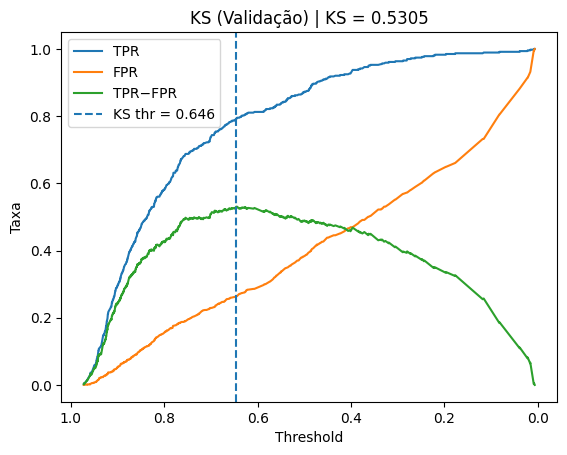

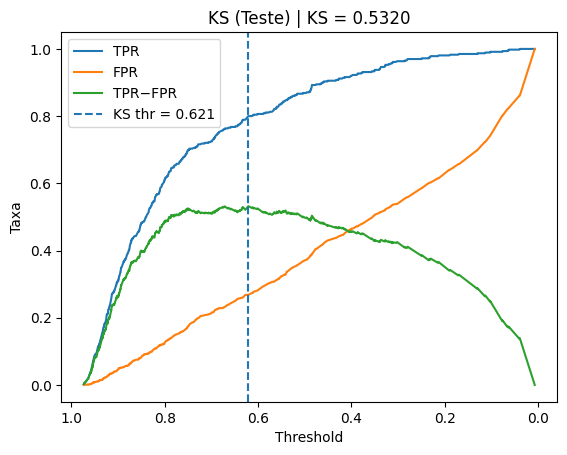

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_ks(y_true, y_proba, title="KS Curve"):
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    sep = tpr - fpr
    i = np.argmax(np.abs(sep))
    plt.figure()
    plt.plot(thr, tpr, label="TPR")
    plt.plot(thr, fpr, label="FPR")
    plt.plot(thr, sep, label="TPR−FPR")
    plt.axvline(thr[i], linestyle="--", label=f"KS thr = {thr[i]:.3f}")
    plt.title(title + f" | KS = {np.abs(sep[i]):.4f}")
    plt.xlabel("Threshold")
    plt.ylabel("Taxa")
    plt.gca().invert_xaxis()  # thresholds do roc_curve descem; inverter deixa mais intuitivo
    plt.legend()
    plt.show()

plot_ks(val_y,  val_proba,  "KS (Validação)")
plot_ks(test_y, test_proba, "KS (Teste)")

### Mudança dos hiperparâmetros do STab

In [ ]:
# Experimento controlado: só muda n_layers
layers_to_try = [2, 3, 4, 6, 8]

base = dict(
    d_model=128, n_heads=4, dropout=0.15, mlp_hidden=128,
    lr=1e-3, weight_decay=1e-4, max_epochs=50, patience=10
)

import pandas as pd

rows = []
for L in layers_to_try:
    cfg = TrainConfig(**base, n_layers=L)
    print(f"\n>>> Rodando n_layers={L}")
    model_L, rep_L, _ = train_and_eval(train_dl, val_dl, test_dl, n_num, cat_cards, cfg)
    rows.append({
        "n_layers": L,
        "KS_VAL":   rep_L["val"]["KS"],
        "KS_TEST":  rep_L["test"]["KS"],
        "AUROC_VAL": rep_L["val"]["AUROC"],
        "AUROC_TEST": rep_L["test"]["AUROC"],
        "thr_used": rep_L["thr"],
    })

df_layers = pd.DataFrame(rows)
print("\n=== Resultados (ordenado por KS_VAL, que é o critério de seleção) ===")
display(df_layers.sort_values("KS_VAL", ascending=False))


>>> Rodando n_layers=2


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=0.88916 | val_AUROC=0.8236
Epoch 002 | train_loss=0.79474 | val_AUROC=0.8252
Epoch 003 | train_loss=0.77800 | val_AUROC=0.8257
Epoch 004 | train_loss=0.76474 | val_AUROC=0.8276
Epoch 005 | train_loss=0.75945 | val_AUROC=0.8327
Epoch 006 | train_loss=0.75402 | val_AUROC=0.8323
Epoch 007 | train_loss=0.76292 | val_AUROC=0.8296
Epoch 008 | train_loss=0.73398 | val_AUROC=0.8360
Epoch 009 | train_loss=0.72557 | val_AUROC=0.8367
Epoch 010 | train_loss=0.73363 | val_AUROC=0.8357
Epoch 011 | train_loss=0.73025 | val_AUROC=0.8312
Epoch 012 | train_loss=0.74348 | val_AUROC=0.8337
Epoch 013 | train_loss=0.72341 | val_AUROC=0.8355
Epoch 014 | train_loss=0.72279 | val_AUROC=0.8352
Epoch 015 | train_loss=0.70770 | val_AUROC=0.8361
Epoch 016 | train_loss=0.70925 | val_AUROC=0.8219
Epoch 017 | train_loss=0.70776 | val_AUROC=0.8333
Epoch 018 | train_loss=0.69652 | val_AUROC=0.8335
Epoch 019 | train_loss=0.69376 | val_AUROC=0.8295
Early stopping (sem melhora por 10 épocas).

=== V

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=1.03441 | val_AUROC=0.8173
Epoch 002 | train_loss=0.80489 | val_AUROC=0.8277
Epoch 003 | train_loss=0.79625 | val_AUROC=0.8237
Epoch 004 | train_loss=0.78490 | val_AUROC=0.8292
Epoch 005 | train_loss=0.76037 | val_AUROC=0.8307
Epoch 006 | train_loss=0.77301 | val_AUROC=0.8351
Epoch 007 | train_loss=0.75655 | val_AUROC=0.8322
Epoch 008 | train_loss=0.73592 | val_AUROC=0.8355
Epoch 009 | train_loss=0.73030 | val_AUROC=0.8352
Epoch 010 | train_loss=0.74361 | val_AUROC=0.8351
Epoch 011 | train_loss=0.72687 | val_AUROC=0.8335
Epoch 012 | train_loss=0.72730 | val_AUROC=0.8366
Epoch 013 | train_loss=0.72323 | val_AUROC=0.8383
Epoch 014 | train_loss=0.73563 | val_AUROC=0.8364
Epoch 015 | train_loss=0.73637 | val_AUROC=0.8321
Epoch 016 | train_loss=0.71648 | val_AUROC=0.8353
Epoch 017 | train_loss=0.71401 | val_AUROC=0.8364
Epoch 018 | train_loss=0.70088 | val_AUROC=0.8343
Epoch 019 | train_loss=0.70062 | val_AUROC=0.8336
Epoch 020 | train_loss=0.69780 | val_AUROC=0.8303


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=1.32476 | val_AUROC=0.8178
Epoch 002 | train_loss=0.83237 | val_AUROC=0.8284
Epoch 003 | train_loss=0.78760 | val_AUROC=0.8269
Epoch 004 | train_loss=0.80824 | val_AUROC=0.8366
Epoch 005 | train_loss=0.76528 | val_AUROC=0.8356
Epoch 006 | train_loss=0.76268 | val_AUROC=0.8366
Epoch 007 | train_loss=0.75706 | val_AUROC=0.8357
Epoch 008 | train_loss=0.73148 | val_AUROC=0.8368
Epoch 009 | train_loss=0.73267 | val_AUROC=0.8370
Epoch 010 | train_loss=0.74850 | val_AUROC=0.8358
Epoch 011 | train_loss=0.72368 | val_AUROC=0.8383
Epoch 012 | train_loss=0.71769 | val_AUROC=0.8370
Epoch 013 | train_loss=0.71576 | val_AUROC=0.8372
Epoch 014 | train_loss=0.72779 | val_AUROC=0.8372
Epoch 015 | train_loss=0.73250 | val_AUROC=0.8393
Epoch 016 | train_loss=0.72590 | val_AUROC=0.8369
Epoch 017 | train_loss=0.70486 | val_AUROC=0.8343
Epoch 018 | train_loss=0.70708 | val_AUROC=0.8356
Epoch 019 | train_loss=0.70368 | val_AUROC=0.8354
Epoch 020 | train_loss=0.69271 | val_AUROC=0.8367


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=1.99708 | val_AUROC=0.7238
Epoch 002 | train_loss=1.03025 | val_AUROC=0.8227
Epoch 003 | train_loss=0.87049 | val_AUROC=0.8213
Epoch 004 | train_loss=0.80581 | val_AUROC=0.8298
Epoch 005 | train_loss=0.80630 | val_AUROC=0.8311
Epoch 006 | train_loss=0.78004 | val_AUROC=0.8303
Epoch 007 | train_loss=0.77468 | val_AUROC=0.8339
Epoch 008 | train_loss=0.74283 | val_AUROC=0.8351
Epoch 009 | train_loss=0.74041 | val_AUROC=0.8348
Epoch 010 | train_loss=0.72921 | val_AUROC=0.8351
Epoch 011 | train_loss=0.74670 | val_AUROC=0.8370
Epoch 012 | train_loss=0.73683 | val_AUROC=0.8389
Epoch 013 | train_loss=0.73417 | val_AUROC=0.8393
Epoch 014 | train_loss=0.73076 | val_AUROC=0.8401
Epoch 015 | train_loss=0.73119 | val_AUROC=0.8417
Epoch 016 | train_loss=0.71154 | val_AUROC=0.8423
Epoch 017 | train_loss=0.71643 | val_AUROC=0.8402
Epoch 018 | train_loss=0.71122 | val_AUROC=0.8393
Epoch 019 | train_loss=0.70802 | val_AUROC=0.8376
Epoch 020 | train_loss=0.71706 | val_AUROC=0.8391


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=2.41614 | val_AUROC=0.8047
Epoch 002 | train_loss=0.95607 | val_AUROC=0.8244
Epoch 003 | train_loss=1.00332 | val_AUROC=0.8272
Epoch 004 | train_loss=0.84432 | val_AUROC=0.8335
Epoch 005 | train_loss=0.80292 | val_AUROC=0.8357
Epoch 006 | train_loss=0.78882 | val_AUROC=0.8364
Epoch 007 | train_loss=0.76031 | val_AUROC=0.8348
Epoch 008 | train_loss=0.74794 | val_AUROC=0.8343
Epoch 009 | train_loss=0.76088 | val_AUROC=0.8352
Epoch 010 | train_loss=0.74139 | val_AUROC=0.8333
Epoch 011 | train_loss=0.77101 | val_AUROC=0.8336
Epoch 012 | train_loss=0.73667 | val_AUROC=0.8370
Epoch 013 | train_loss=0.72543 | val_AUROC=0.8348
Epoch 014 | train_loss=0.73249 | val_AUROC=0.8369
Epoch 015 | train_loss=0.73714 | val_AUROC=0.8364
Epoch 016 | train_loss=0.72030 | val_AUROC=0.8367
Epoch 017 | train_loss=0.71509 | val_AUROC=0.8366
Epoch 018 | train_loss=0.71463 | val_AUROC=0.8373
Epoch 019 | train_loss=0.70543 | val_AUROC=0.8302
Epoch 020 | train_loss=0.71277 | val_AUROC=0.8354


,n_layers,KS_VAL,KS_TEST,AUROC_VAL,AUROC_TEST,thr_used
1,3,0.536276,0.541387,0.838307,0.848216,0.522100
4,8,0.535090,0.537546,0.837295,0.850752,0.516976
3,6,0.534995,0.546423,0.842283,0.852589,0.518416
0,2,0.534585,0.532490,0.836703,0.848838,0.481108
2,4,0.530817,0.550734,0.839290,0.850452,0.472028


In [ ]:
# Escolhe o melhor n_layers pela validação e mostra as linhas correspondentes

best_idx = df_layers["KS_VAL"].idxmax()
best_layers = int(df_layers.loc[best_idx, "n_layers"])
print(f"Melhor n_layers (por KS_VAL): {best_layers}")

print("\nResumo melhor config:")
print(df_layers.loc[best_idx:best_idx, ["n_layers","KS_VAL","KS_TEST","AUROC_VAL","AUROC_TEST","thr_used"]])

Melhor n_layers (por KS_VAL): 3

Resumo melhor config:
   n_layers    KS_VAL   KS_TEST  AUROC_VAL  AUROC_TEST  thr_used
1         3  0.536276  0.541387   0.838307    0.848216    0.5221


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | train_loss=1.04316 | val_AUROC=0.8270
Epoch 002 | train_loss=0.80266 | val_AUROC=0.8322
Epoch 003 | train_loss=0.79428 | val_AUROC=0.8295
Epoch 004 | train_loss=0.79025 | val_AUROC=0.8245
Epoch 005 | train_loss=0.77938 | val_AUROC=0.8350
Epoch 006 | train_loss=0.76502 | val_AUROC=0.8333
Epoch 007 | train_loss=0.75174 | val_AUROC=0.8350
Epoch 008 | train_loss=0.73885 | val_AUROC=0.8382
Epoch 009 | train_loss=0.76058 | val_AUROC=0.8348
Epoch 010 | train_loss=0.75245 | val_AUROC=0.8240
Epoch 011 | train_loss=0.73729 | val_AUROC=0.8329
Epoch 012 | train_loss=0.71923 | val_AUROC=0.8335
Epoch 013 | train_loss=0.71838 | val_AUROC=0.8376
Epoch 014 | train_loss=0.72680 | val_AUROC=0.8361
Epoch 015 | train_loss=0.72273 | val_AUROC=0.8332
Epoch 016 | train_loss=0.72263 | val_AUROC=0.8371
Epoch 017 | train_loss=0.73208 | val_AUROC=0.8303
Epoch 018 | train_loss=0.71525 | val_AUROC=0.8337
Early stopping (sem melhora por 10 épocas).

=== Validação (threshold pelo KS da validação) ===
AURO

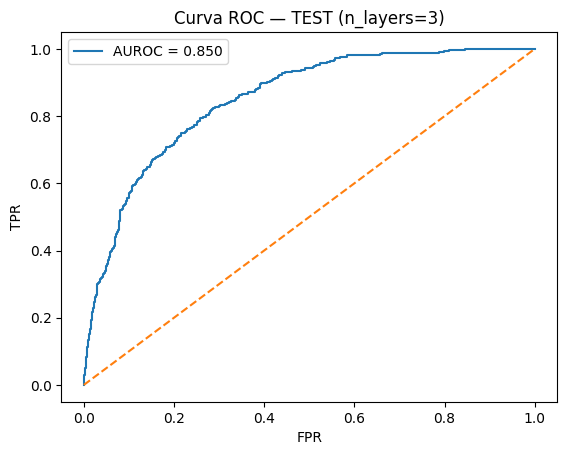

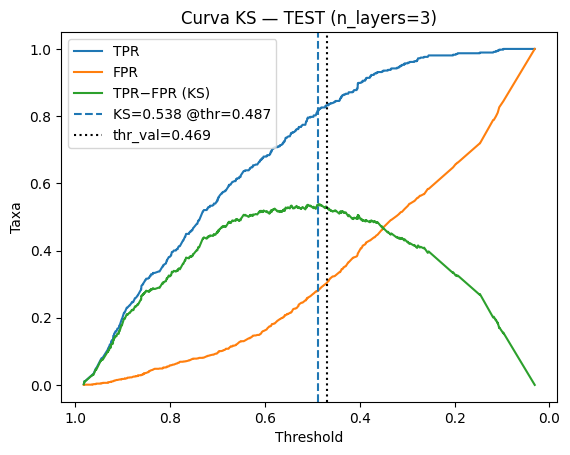

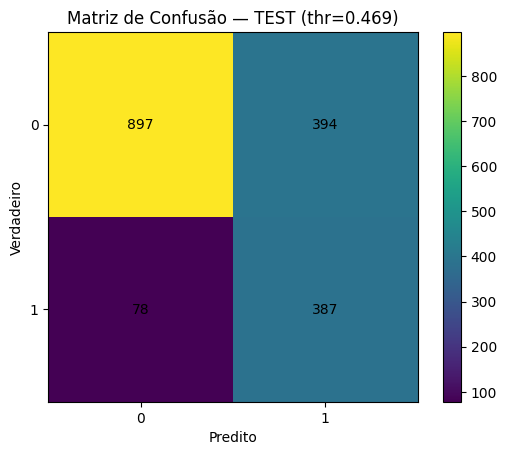


Classification report (TEST) @thr_val:
               precision    recall  f1-score   support

         0.0     0.9200    0.6948    0.7917      1291
         1.0     0.4955    0.8323    0.6212       465

    accuracy                         0.7312      1756
   macro avg     0.7078    0.7635    0.7064      1756
weighted avg     0.8076    0.7312    0.7465      1756



In [ ]:
# AVALIAÇÃO STab com n_layers=6 (compatível com TrainConfig/2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, roc_curve, confusion_matrix,
    classification_report, precision_recall_fscore_support,
    log_loss, mean_squared_error
)

# 1) Pega a classe de config disponível (TrainConfig2 OU TrainConfig)
CfgClass = globals().get("TrainConfig2", globals().get("TrainConfig"))
assert CfgClass is not None, "Defina antes a classe TrainConfig (ou TrainConfig2)."

# 2) Cria a config com n_layers=3 (mantém defaults do seu dataclass para o resto)
try:
    cfg = CfgClass(
        n_layers=3, d_model=128, n_heads=4, mlp_hidden=128,
        dropout=0.15, lr=1e-3, weight_decay=1e-4,
        max_epochs=60, patience=10
    )
except TypeError:
    # se sua TrainConfig não tiver todos esses campos, crie só com os que existem:
    cfg = CfgClass()
    if hasattr(cfg, "n_layers"):      cfg.n_layers = 3
    if hasattr(cfg, "d_model"):       cfg.d_model = 128
    if hasattr(cfg, "n_heads"):       cfg.n_heads = 4
    if hasattr(cfg, "mlp_hidden"):    cfg.mlp_hidden = 128
    if hasattr(cfg, "dropout"):       cfg.dropout = 0.15
    if hasattr(cfg, "lr"):            cfg.lr = 1e-3
    if hasattr(cfg, "weight_decay"):  cfg.weight_decay = 1e-4
    if hasattr(cfg, "max_epochs"):    cfg.max_epochs = 60
    if hasattr(cfg, "patience"):      cfg.patience = 10

# 3) Escolhe o trainer disponível
if "train_and_eval_v2" in globals():
    model, report = train_and_eval_v2(cfg)[:2]
else:
    assert all(k in globals() for k in ["train_dl","val_dl","test_dl","n_num","cat_cards"]), \
        "Crie train_dl/val_dl/test_dl e n_num/cat_cards antes."
    model, report, _ = train_and_eval(train_dl, val_dl, test_dl, n_num, cat_cards, cfg)

thr = float(report["thr"])

# 4) Pega loaders (se existir make_loaders) e calcula probabilidades
if "make_loaders" in globals():
    _, val_dl, test_dl = make_loaders()
val_proba, val_y   = predict_proba(model, val_dl)
test_proba, test_y = predict_proba(model, test_dl)

# 5) Métricas no TEST (no threshold escolhido pela KS da VALIDAÇÃO)
mse   = mean_squared_error(test_y, test_proba)
ce    = log_loss(test_y, test_proba, labels=[0,1])
auroc = roc_auc_score(test_y, test_proba)
fpr, tpr, thr_vec = roc_curve(test_y, test_proba)
ks_test = float(np.max(np.abs(tpr - fpr)))

y_pred = (test_proba >= thr).astype(int)
prec, rec, f1, _ = precision_recall_fscore_support(test_y, y_pred, average="binary", zero_division=0)

print(f"MSE: {mse:.6f}")
print(f"Cross-Entropy (Log Loss): {ce:.6f}")
print(f"AUROC: {auroc:.4f}")
print(f"KS Estatística: {ks_test:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"(Threshold usado = KS da validação: {thr:.4f})")

# 6) GRÁFICOS — ROC, KS e Matriz de Confusão (TEST)
# ROC
plt.figure()
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Curva ROC — TEST (n_layers=3)")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()

# KS (em função do threshold)
ks_vals = tpr - fpr
i_star = np.argmax(np.abs(ks_vals))
plt.figure()
plt.plot(thr_vec, tpr, label="TPR")
plt.plot(thr_vec, fpr, label="FPR")
plt.plot(thr_vec, ks_vals, label="TPR−FPR (KS)")
plt.axvline(thr_vec[i_star], linestyle="--", label=f"KS={np.abs(ks_vals[i_star]):.3f} @thr={thr_vec[i_star]:.3f}")
plt.axvline(thr, color="k", linestyle=":", label=f"thr_val={thr:.3f}")
plt.gca().invert_xaxis()
plt.title("Curva KS — TEST (n_layers=3)")
plt.xlabel("Threshold"); plt.ylabel("Taxa"); plt.legend(); plt.show()

# Matriz de confusão no thr da VAL
cm = confusion_matrix(test_y, y_pred)
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title(f"Matriz de Confusão — TEST (thr={thr:.3f})")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.xticks([0,1],[0,1]); plt.yticks([0,1],[0,1])
for i in range(2):
    for j in range(2):
        plt.text(j, i, int(cm[i, j]), ha="center", va="center")
plt.colorbar(); plt.show()

print("\nClassification report (TEST) @thr_val:\n",
      classification_report(test_y, y_pred, digits=4))

In [ ]:
# TUDO-EM-UMA CÉLULA (ABLAÇÃO)
import os, random, numpy as np, pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler, Dataset
from dataclasses import dataclass
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split

# ------------------ Seed & Device ------------------
def seed_everything(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
seed_everything(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------ Helpers & Métricas ------------------
def _to_tensor(x, dtype=None, device=None):
    if isinstance(x, torch.Tensor): t = x
    elif isinstance(x, np.ndarray): t = torch.from_numpy(x)
    else: t = torch.tensor(x)
    if dtype is not None: t = t.to(dtype)
    if device is not None: t = t.to(device)
    return t

def ks_statistic(y_true, y_proba):
    fpr, tpr, thr = roc_curve(y_true, y_proba)
    sep = np.abs(tpr - fpr); i = np.argmax(sep)
    return float(sep[i]), float(thr[i])

def compute_metrics(y_true, y_proba, threshold=0.5):
    auroc = roc_auc_score(y_true, y_proba)
    ks, ks_thr = ks_statistic(y_true, y_proba)
    y_pred = (y_proba >= threshold).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    return {"AUROC": auroc, "KS": ks, "KS_thr": ks_thr,
            "Precision@thr": prec, "Recall@thr": rec, "F1@thr": f1, "ConfusionMatrix": cm}

def predict_proba(model, dl):
    model.eval(); preds, ys = [], []
    with torch.no_grad():
        for xnum, xcat, y in dl:
            xnum = _to_tensor(xnum, torch.float32, device)
            xcat = _to_tensor(xcat, torch.long,    device)
            y    = _to_tensor(y,    torch.float32, device)
            # Ensure model can handle None for xnum or xcat if they are empty
            if xnum.numel() == 0:
                xnum = None
            if xcat.numel() == 0:
                xcat = None
            prob = torch.sigmoid(model(xnum, xcat))
            preds.append(prob.detach().cpu().numpy()); ys.append(y.detach().cpu().numpy())
    return np.concatenate(preds), np.concatenate(ys)

def compute_pos_weight(y):
    y = np.asarray(y); n_pos = (y==1).sum(); n_neg = (y==0).sum()
    ratio = (n_neg / max(n_pos,1)) if n_pos>0 else 1.0
    return torch.tensor(max(ratio,1.0), dtype=torch.float32, device=device)


# ------------------ Dataset fallback (se necessário) ------------------
class TabDataset(Dataset):
    def __init__(self, X_num, X_cat, y):
        self.X_num = np.asarray(X_num, dtype=np.float32)
        self.X_cat = np.asarray(X_cat, dtype=np.int64)
        self.y = np.asarray(y, dtype=np.int64)
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return self.X_num[i], self.X_cat[i], self.y[i]

# Constrói datasets se não existirem mas os arrays estiverem no escopo
if "train_ds" not in globals():
    required = ["Xtr_num","Xtr_cat","ytr","Xva_num","Xva_cat","yva","Xte_num","Xte_cat","yte"]
    missing = [k for k in required if k not in globals()]
    assert not missing, f"Faltam variáveis para montar os datasets: {missing}"
    train_ds = TabDataset(Xtr_num, Xtr_cat, ytr)
    val_ds   = TabDataset(Xva_num, Xva_cat, yva)
    test_ds  = TabDataset(Xte_num, Xte_cat, yte)

# ------------------ Modelo STabV2 ------------------
def _act_callable(name: str):
    name = name.lower()
    return {"gelu": F.gelu, "relu": F.relu, "tanh": torch.tanh, "sigmoid": torch.sigmoid}.get(name, F.gelu)
def _act_module(name: str):
    name = name.lower()
    return {"gelu": nn.GELU(), "relu": nn.ReLU(), "tanh": nn.Tanh(), "sigmoid": nn.Sigmoid()}.get(name, nn.GELU())

class STabV2(nn.Module):
    def __init__(self, n_num, cat_cardinalities, d_model=128, n_heads=4, n_layers=4,
                 dropout=0.15, mlp_hidden=128, transf_activation="gelu", head_activation="gelu"):
        super().__init__()
        self.n_num = n_num; self.n_cat = len(cat_cardinalities); self.d_model = d_model
        if n_num > 0:
            self.num_linear = nn.Linear(1, d_model)
            self.num_col_emb = nn.Embedding(n_num, d_model)
        else:
            self.num_linear = self.num_col_emb = None
        self.cat_embs = nn.ModuleList([nn.Embedding(c, d_model) for c in cat_cardinalities])
        self.cls_token = nn.Parameter(torch.randn(1,1,d_model)*0.02)
        enc_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=n_heads, dim_feedforward=d_model*4, dropout=dropout,
            batch_first=True, activation=_act_callable(transf_activation), norm_first=True
        )
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers=n_layers)
        self.dropout = nn.Dropout(dropout)
        self.head = nn.Sequential(nn.Linear(d_model, mlp_hidden), _act_module(head_activation),
                                  nn.Dropout(dropout), nn.Linear(mlp_hidden, 1))
        self._init_weights()
    def _init_weights(self):
        if self.n_num > 0 and self.num_linear is not None and self.num_col_emb is not None:
            nn.init.xavier_uniform_(self.num_linear.weight); nn.init.zeros_(self.num_linear.bias)
            nn.init.normal_(self.num_col_emb.weight, std=0.02)
        for emb in self.cat_embs: nn.init.normal_(emb.weight, std=0.02)
        nn.init.normal_(self.cls_token, std=0.02)
        for m in self.head:
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight);
                if m.bias is not None: nn.init.zeros_(m.bias)
    def forward(self, x_num, x_cat):
        B = x_num.shape[0] if x_num is not None and x_num.numel() > 0 else (x_cat.shape[0] if x_cat is not None and x_cat.numel() > 0 else 0)
        if B == 0: return torch.empty(0, device=self.cls_token.device) # Handle empty batch
        toks = []
        if self.n_num > 0 and x_num is not None and x_num.numel() > 0:
            idxs = torch.arange(self.n_num, device=x_num.device).unsqueeze(0).expand(B, -1)
            toks.append(self.num_linear(x_num.unsqueeze(-1)) + self.num_col_emb(idxs))
        if self.n_cat > 0 and x_cat is not None and x_cat.numel() > 0:
            toks.append(torch.cat([emb(x_cat[:, j]).unsqueeze(1) for j, emb in enumerate(self.cat_embs)], dim=1))
        if not toks: raise ValueError("Sem tokens (verifique colunas).")
        x = torch.cat(toks, dim=1)
        x = torch.cat([self.cls_token.expand(B,1,-1), x], dim=1)
        x = self.encoder(x)
        return self.head(self.dropout(x[:,0,:])).squeeze(1)


# ------------------ Loaders (com/sem oversampling) ------------------
def make_loaders(batch_size=256, oversample=False):
    global train_ds, val_ds, test_ds, ytr
    if oversample:
        y = np.asarray(ytr); class_count = np.bincount(y)
        class_w = 1.0/np.maximum(class_count,1); sample_w = class_w[y]
        sampler = WeightedRandomSampler(weights=torch.tensor(sample_w, dtype=torch.double),
                                        num_samples=len(sample_w), replacement=True)
        train_dl = DataLoader(train_ds, batch_size=batch_size, sampler=sampler, drop_last=False)
    else:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
    val_dl  = DataLoader(val_ds,  batch_size=batch_size, shuffle=False, drop_last=False)
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False, drop_last=False)
    return train_dl, val_dl, test_dl

# ------------------ Treinador ------------------
@dataclass
class TrainConfig2:
    d_model: int = 128
    n_heads: int = 4
    n_layers: int = 4
    dropout: float = 0.15
    mlp_hidden: int = 128
    lr: float = 1e-3
    weight_decay: float = 1e-4
    max_epochs: int = 50
    patience: int = 10
    transf_activation: str = "gelu"
    head_activation: str = "gelu"
    optimizer: str = "AdamW"   # ou "Adam"
    oversample: bool = False

def train_and_eval_v2(cfg: TrainConfig2, n_num=None, cat_cards=None):
    # detectar n_num/cat_cards
    # Use the global variables directly
    n_num, cat_cards, ytr
    if n_num is None:
        n_num = globals().get("n_num", 0) # Default to 0 if not found
    if cat_cards is None:
        cat_cards = globals().get("cat_cards", []) # Default to empty list if not found

    train_dl, val_dl, test_dl = make_loaders(batch_size=256, oversample=cfg.oversample)
    model = STabV2(n_num=n_num, cat_cardinalities=cat_cards, d_model=cfg.d_model, n_heads=cfg.n_heads,
                   n_layers=cfg.n_layers, dropout=cfg.dropout, mlp_hidden=cfg.mlp_hidden,
                   transf_activation=cfg.transf_activation, head_activation=cfg.head_activation).to(device)
    pos_weight = torch.tensor(1.0, dtype=torch.float32, device=device) if cfg.oversample else compute_pos_weight(ytr)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optim = (torch.optim.Adam if cfg.optimizer.lower()=="adam" else torch.optim.AdamW)(
        model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay
    )
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=max(cfg.max_epochs,10))

    best_val, best_state, no_imp = -np.inf, None, 0
    for epoch in range(1, cfg.max_epochs+1):
        model.train(); total = 0.0
        for xnum, xcat, y in train_dl:
            xnum = _to_tensor(xnum, torch.float32, device)
            xcat = _to_tensor(xcat, torch.long,    device)
            y    = _to_tensor(y,    torch.float32, device)
            # Ensure model can handle None for xnum or xcat if they are empty
            if xnum is not None and xnum.numel() == 0:
                xnum = None
            if xcat is not None and xcat.numel() == 0:
                xcat = None

            logits = model(xnum, xcat)
            loss = criterion(logits, y)
            optim.zero_grad(); loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
            optim.step(); total += loss.item() * xnum.size(0) if xnum is not None else loss.item() * xcat.size(0)
        scheduler.step()
        # validação
        val_proba, val_y = predict_proba(model, val_dl)
        val_auroc = roc_auc_score(val_y, val_proba)
        print(f"Epoch {epoch:03d} | loss={total/len(train_dl.dataset):.5f} | val_AUROC={val_auroc:.4f}")
        if val_auroc > best_val + 1e-4:
            best_val, best_state, no_imp = val_auroc, {k:v.cpu().clone() for k,v in model.state_dict().items()}, 0
        else:
            no_imp += 1
            if no_imp >= cfg.patience:
                print(f"Early stopping (patience={cfg.patience})."); break

    if best_state is not None: model.load_state_dict(best_state)

    # avaliação final
    val_proba, val_y = predict_proba(model, val_dl)
    test_proba, test_y = predict_proba(model, test_dl)
    thr_val = ks_statistic(val_y, val_proba)[1]
    metrics_val  = compute_metrics(val_y,  val_proba,  threshold=thr_val)
    metrics_test = compute_metrics(test_y, test_proba, threshold=thr_val)
    return model, {"val": metrics_val, "test": metrics_test, "thr": thr_val}


# ------------------ Runner de Experimentos (1 fator por vez) ------------------
def run_exp(label, **changes):
    base = TrainConfig2()  # baseline (GELU, AdamW, etc.)
    for k,v in changes.items(): setattr(base, k, v)
    print(f"\n=== {label} ==="); print(base)
    # Pass n_num and cat_cards to train_and_eval_v2 explicitly
    _, rep = train_and_eval_v2(base, n_num=n_num, cat_cards=cat_cards)
    return {
        "exp": label,
        "n_layers": base.n_layers, "d_model": base.d_model, "mlp_hidden": base.mlp_hidden,
        "dropout": base.dropout, "weight_decay": base.weight_decay, "lr": base.lr,
        "optimizer": base.optimizer, "activ": f"T:{base.transf_activation}/H:{base.head_activation}",
        "oversample": base.oversample,
        "KS_VAL": rep["val"]["KS"], "KS_TEST": rep["test"]["KS"],
        "AUROC_VAL": rep["val"]["AUROC"], "AUROC_TEST": rep["test"]["AUROC"],
        "thr_used": rep["thr"]
    }

# ---- Lista de testes (ajuste livre; cada um muda só 1 coisa) ----
experiments = []
experiments.append(run_exp("baseline"))                              # referência
experiments.append(run_exp("n_layers=6", n_layers=6))               # camadas
experiments.append(run_exp("mlp_hidden=192", mlp_hidden=192))       # unidades intermediárias (head)
experiments.append(run_exp("lr=3e-4", lr=3e-4))                     # taxa de aprendizagem
experiments.append(run_exp("activation=ReLU", transf_activation="relu", head_activation="relu"))  # ativação
experiments.append(run_exp("optimizer=Adam", optimizer="Adam"))     # otimizador
experiments.append(run_exp("dropout=0.20", dropout=0.20))           # dropout
experiments.append(run_exp("weight_decay=1e-3", weight_decay=1e-3)) # regularização
experiments.append(run_exp("oversampling", oversample=True))        # amostragem básica

df_results = pd.DataFrame(experiments).sort_values(["KS_VAL","KS_TEST"], ascending=False)
print("\n=== Ranking por KS (VALIDAÇÃO) ===")
display(df_results)


=== baseline ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, mlp_hidden=128, lr=0.001, weight_decay=0.0001, max_epochs=50, patience=10, transf_activation='gelu', head_activation='gelu', optimizer='AdamW', oversample=False)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.05659 | val_AUROC=0.8099
Epoch 002 | loss=0.83976 | val_AUROC=0.8319
Epoch 003 | loss=0.79622 | val_AUROC=0.8340
Epoch 004 | loss=0.79619 | val_AUROC=0.8305
Epoch 005 | loss=0.77162 | val_AUROC=0.8357
Epoch 006 | loss=0.75254 | val_AUROC=0.8298
Epoch 007 | loss=0.74000 | val_AUROC=0.8342
Epoch 008 | loss=0.73926 | val_AUROC=0.8340
Epoch 009 | loss=0.75032 | val_AUROC=0.8336
Epoch 010 | loss=0.72903 | val_AUROC=0.8339
Epoch 011 | loss=0.72257 | val_AUROC=0.8340
Epoch 012 | loss=0.71843 | val_AUROC=0.8321
Epoch 013 | loss=0.72641 | val_AUROC=0.8328
Epoch 014 | loss=0.71474 | val_AUROC=0.8225
Epoch 015 | loss=0.72372 | val_AUROC=0.8342
Early stopping (patience=10).

=== n_layers=6 ===
TrainConfig2(d_model=128, n_heads=4, n_layers=6, dropout=0.15, mlp_hidden=128, lr=0.001, weight_decay=0.0001, max_epochs=50, patience=10, transf_activation='gelu', head_activation='gelu', optimizer='AdamW', oversample=False)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.20857 | val_AUROC=0.8300
Epoch 002 | loss=0.96230 | val_AUROC=0.8341
Epoch 003 | loss=0.81095 | val_AUROC=0.8293
Epoch 004 | loss=0.81490 | val_AUROC=0.8322
Epoch 005 | loss=0.78928 | val_AUROC=0.8354
Epoch 006 | loss=0.74881 | val_AUROC=0.8297
Epoch 007 | loss=0.76006 | val_AUROC=0.8359
Epoch 008 | loss=0.74170 | val_AUROC=0.8357
Epoch 009 | loss=0.75096 | val_AUROC=0.8373
Epoch 010 | loss=0.74040 | val_AUROC=0.8374
Epoch 011 | loss=0.74607 | val_AUROC=0.8361
Epoch 012 | loss=0.74395 | val_AUROC=0.8333
Epoch 013 | loss=0.73761 | val_AUROC=0.8345
Epoch 014 | loss=0.72069 | val_AUROC=0.8342
Epoch 015 | loss=0.73450 | val_AUROC=0.8348
Epoch 016 | loss=0.72777 | val_AUROC=0.8357
Epoch 017 | loss=0.72273 | val_AUROC=0.8339
Epoch 018 | loss=0.71132 | val_AUROC=0.8337
Epoch 019 | loss=0.70507 | val_AUROC=0.8294
Epoch 020 | loss=0.70546 | val_AUROC=0.8313
Early stopping (patience=10).

=== mlp_hidden=192 ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, mlp

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.20801 | val_AUROC=0.8291
Epoch 002 | loss=0.88045 | val_AUROC=0.8294
Epoch 003 | loss=0.79024 | val_AUROC=0.8320
Epoch 004 | loss=0.81368 | val_AUROC=0.8281
Epoch 005 | loss=0.76071 | val_AUROC=0.8354
Epoch 006 | loss=0.77904 | val_AUROC=0.8284
Epoch 007 | loss=0.76312 | val_AUROC=0.8358
Epoch 008 | loss=0.75355 | val_AUROC=0.8341
Epoch 009 | loss=0.75212 | val_AUROC=0.8365
Epoch 010 | loss=0.73523 | val_AUROC=0.8384
Epoch 011 | loss=0.73057 | val_AUROC=0.8379
Epoch 012 | loss=0.71127 | val_AUROC=0.8362
Epoch 013 | loss=0.71803 | val_AUROC=0.8338
Epoch 014 | loss=0.71518 | val_AUROC=0.8346
Epoch 015 | loss=0.72141 | val_AUROC=0.8357
Epoch 016 | loss=0.72423 | val_AUROC=0.8333
Epoch 017 | loss=0.71849 | val_AUROC=0.8318
Epoch 018 | loss=0.71016 | val_AUROC=0.8334
Epoch 019 | loss=0.70455 | val_AUROC=0.8320
Epoch 020 | loss=0.69499 | val_AUROC=0.8272
Early stopping (patience=10).

=== lr=3e-4 ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, mlp_hidden

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=0.94690 | val_AUROC=0.8247
Epoch 002 | loss=0.79510 | val_AUROC=0.8344
Epoch 003 | loss=0.76103 | val_AUROC=0.8322
Epoch 004 | loss=0.77812 | val_AUROC=0.8302
Epoch 005 | loss=0.75679 | val_AUROC=0.8325
Epoch 006 | loss=0.75291 | val_AUROC=0.8308
Epoch 007 | loss=0.73763 | val_AUROC=0.8316
Epoch 008 | loss=0.73500 | val_AUROC=0.8306
Epoch 009 | loss=0.73883 | val_AUROC=0.8306
Epoch 010 | loss=0.73209 | val_AUROC=0.8289
Epoch 011 | loss=0.74163 | val_AUROC=0.8323
Epoch 012 | loss=0.72090 | val_AUROC=0.8325
Early stopping (patience=10).

=== activation=ReLU ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, mlp_hidden=128, lr=0.001, weight_decay=0.0001, max_epochs=50, patience=10, transf_activation='relu', head_activation='relu', optimizer='AdamW', oversample=False)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.15503 | val_AUROC=0.8224
Epoch 002 | loss=0.85684 | val_AUROC=0.8285
Epoch 003 | loss=0.82949 | val_AUROC=0.8322
Epoch 004 | loss=0.78183 | val_AUROC=0.8333
Epoch 005 | loss=0.75775 | val_AUROC=0.8324
Epoch 006 | loss=0.75304 | val_AUROC=0.8323
Epoch 007 | loss=0.75868 | val_AUROC=0.8337
Epoch 008 | loss=0.75732 | val_AUROC=0.8334
Epoch 009 | loss=0.75246 | val_AUROC=0.8320
Epoch 010 | loss=0.73850 | val_AUROC=0.8340
Epoch 011 | loss=0.72224 | val_AUROC=0.8336
Epoch 012 | loss=0.72827 | val_AUROC=0.8333
Epoch 013 | loss=0.71738 | val_AUROC=0.8330
Epoch 014 | loss=0.71888 | val_AUROC=0.8335
Epoch 015 | loss=0.71870 | val_AUROC=0.8306
Epoch 016 | loss=0.71935 | val_AUROC=0.8281
Epoch 017 | loss=0.70717 | val_AUROC=0.8267
Epoch 018 | loss=0.70275 | val_AUROC=0.8300
Epoch 019 | loss=0.68852 | val_AUROC=0.8270
Epoch 020 | loss=0.69072 | val_AUROC=0.8283
Early stopping (patience=10).

=== optimizer=Adam ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, mlp

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.34038 | val_AUROC=0.8110
Epoch 002 | loss=0.85994 | val_AUROC=0.8324
Epoch 003 | loss=0.81613 | val_AUROC=0.8355
Epoch 004 | loss=0.76844 | val_AUROC=0.8317
Epoch 005 | loss=0.77480 | val_AUROC=0.8317
Epoch 006 | loss=0.75239 | val_AUROC=0.8348
Epoch 007 | loss=0.73811 | val_AUROC=0.8316
Epoch 008 | loss=0.75036 | val_AUROC=0.8318
Epoch 009 | loss=0.73129 | val_AUROC=0.8345
Epoch 010 | loss=0.72271 | val_AUROC=0.8353
Epoch 011 | loss=0.73600 | val_AUROC=0.8354
Epoch 012 | loss=0.71751 | val_AUROC=0.8314
Epoch 013 | loss=0.71656 | val_AUROC=0.8348
Early stopping (patience=10).

=== dropout=0.20 ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.2, mlp_hidden=128, lr=0.001, weight_decay=0.0001, max_epochs=50, patience=10, transf_activation='gelu', head_activation='gelu', optimizer='AdamW', oversample=False)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.22607 | val_AUROC=0.8231
Epoch 002 | loss=0.83501 | val_AUROC=0.8264
Epoch 003 | loss=0.82535 | val_AUROC=0.8316
Epoch 004 | loss=0.76668 | val_AUROC=0.8322
Epoch 005 | loss=0.78818 | val_AUROC=0.8337
Epoch 006 | loss=0.78085 | val_AUROC=0.8346
Epoch 007 | loss=0.77438 | val_AUROC=0.8308
Epoch 008 | loss=0.75373 | val_AUROC=0.8344
Epoch 009 | loss=0.73620 | val_AUROC=0.8313
Epoch 010 | loss=0.75261 | val_AUROC=0.8350
Epoch 011 | loss=0.72780 | val_AUROC=0.8301
Epoch 012 | loss=0.73103 | val_AUROC=0.8285
Epoch 013 | loss=0.73626 | val_AUROC=0.8262
Epoch 014 | loss=0.72027 | val_AUROC=0.8274
Epoch 015 | loss=0.71948 | val_AUROC=0.8324
Epoch 016 | loss=0.71203 | val_AUROC=0.8286
Epoch 017 | loss=0.71136 | val_AUROC=0.8283
Epoch 018 | loss=0.70570 | val_AUROC=0.8333
Epoch 019 | loss=0.71044 | val_AUROC=0.8322
Epoch 020 | loss=0.70426 | val_AUROC=0.8261
Early stopping (patience=10).

=== weight_decay=1e-3 ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, 

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.24056 | val_AUROC=0.7880
Epoch 002 | loss=0.83255 | val_AUROC=0.8345
Epoch 003 | loss=0.79769 | val_AUROC=0.8345
Epoch 004 | loss=0.76949 | val_AUROC=0.8251
Epoch 005 | loss=0.75720 | val_AUROC=0.8341
Epoch 006 | loss=0.74743 | val_AUROC=0.8324
Epoch 007 | loss=0.75361 | val_AUROC=0.8334
Epoch 008 | loss=0.76314 | val_AUROC=0.8274
Epoch 009 | loss=0.73352 | val_AUROC=0.8361
Epoch 010 | loss=0.74209 | val_AUROC=0.8340
Epoch 011 | loss=0.72409 | val_AUROC=0.8354
Epoch 012 | loss=0.72319 | val_AUROC=0.8334
Epoch 013 | loss=0.71698 | val_AUROC=0.8331
Epoch 014 | loss=0.73249 | val_AUROC=0.8330
Epoch 015 | loss=0.70965 | val_AUROC=0.8327
Epoch 016 | loss=0.71331 | val_AUROC=0.8326
Epoch 017 | loss=0.70050 | val_AUROC=0.8255
Epoch 018 | loss=0.69807 | val_AUROC=0.8275
Epoch 019 | loss=0.70769 | val_AUROC=0.8277
Early stopping (patience=10).

=== oversampling ===
TrainConfig2(d_model=128, n_heads=4, n_layers=4, dropout=0.15, mlp_hidden=128, lr=0.001, weight_decay=0.0001, ma

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=0.89092 | val_AUROC=0.8229
Epoch 002 | loss=0.55915 | val_AUROC=0.8307
Epoch 003 | loss=0.53424 | val_AUROC=0.8277
Epoch 004 | loss=0.52029 | val_AUROC=0.8318
Epoch 005 | loss=0.52081 | val_AUROC=0.8282
Epoch 006 | loss=0.50081 | val_AUROC=0.8323
Epoch 007 | loss=0.48969 | val_AUROC=0.8348
Epoch 008 | loss=0.51149 | val_AUROC=0.8320
Epoch 009 | loss=0.50786 | val_AUROC=0.8325
Epoch 010 | loss=0.48903 | val_AUROC=0.8348
Epoch 011 | loss=0.49240 | val_AUROC=0.8326
Epoch 012 | loss=0.47258 | val_AUROC=0.8306
Epoch 013 | loss=0.47729 | val_AUROC=0.8237
Epoch 014 | loss=0.48858 | val_AUROC=0.8294
Epoch 015 | loss=0.48790 | val_AUROC=0.8321
Epoch 016 | loss=0.48690 | val_AUROC=0.8316
Epoch 017 | loss=0.48843 | val_AUROC=0.8309
Early stopping (patience=10).

=== Ranking por KS (VALIDAÇÃO) ===


,exp,n_layers,d_model,mlp_hidden,dropout,weight_decay,lr,optimizer,activ,oversample,KS_VAL,KS_TEST,AUROC_VAL,AUROC_TEST,thr_used
3,lr=3e-4,4,128,128,0.15,0.0001,0.0003,AdamW,T:gelu/H:gelu,False,0.540750,0.530288,0.834394,0.844747,0.552103
0,baseline,4,128,128,0.15,0.0001,0.0010,AdamW,T:gelu/H:gelu,False,0.533167,0.532449,0.835694,0.846912,0.461537
5,optimizer=Adam,4,128,128,0.15,0.0001,0.0010,Adam,T:gelu/H:gelu,False,0.532630,0.528249,0.835504,0.849209,0.540641
7,weight_decay=1e-3,4,128,128,0.15,0.0010,0.0010,AdamW,T:gelu/H:gelu,False,0.529979,0.527720,0.836108,0.845674,0.494178
6,dropout=0.20,4,128,128,0.20,0.0001,0.0010,AdamW,T:gelu/H:gelu,False,0.528119,0.527333,0.834952,0.845238,0.497279
1,n_layers=6,6,128,128,0.15,0.0001,0.0010,AdamW,T:gelu/H:gelu,False,0.526406,0.546698,0.837442,0.850722,0.537161
4,activation=ReLU,4,128,128,0.15,0.0001,0.0010,AdamW,T:relu/H:relu,False,0.525284,0.533886,0.833983,0.850235,0.457786
2,mlp_hidden=192,4,128,192,0.15,0.0001,0.0010,AdamW,T:gelu/H:gelu,False,0.524852,0.536037,0.838379,0.851510,0.468886
8,oversampling,4,128,128,0.15,0.0001,0.0010,AdamW,T:gelu/H:gelu,True,0.515398,0.541031,0.834843,0.850535,0.546920



=== optimizer=Adam ===


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.08534 | val_AUROC=0.8244
Epoch 002 | loss=0.82224 | val_AUROC=0.8303
Epoch 003 | loss=0.79781 | val_AUROC=0.8306
Epoch 004 | loss=0.76239 | val_AUROC=0.8335
Epoch 005 | loss=0.74497 | val_AUROC=0.8355
Epoch 006 | loss=0.75205 | val_AUROC=0.8344
Epoch 007 | loss=0.77530 | val_AUROC=0.8336
Epoch 008 | loss=0.75210 | val_AUROC=0.8316
Epoch 009 | loss=0.72836 | val_AUROC=0.8312
Epoch 010 | loss=0.73970 | val_AUROC=0.8349
Epoch 011 | loss=0.73660 | val_AUROC=0.8338
Epoch 012 | loss=0.71591 | val_AUROC=0.8305
Epoch 013 | loss=0.71670 | val_AUROC=0.8308
Epoch 014 | loss=0.70972 | val_AUROC=0.8339
Epoch 015 | loss=0.71246 | val_AUROC=0.8311
Early stopping (patience=10).
Threshold (KS val): 0.3914
MSE: 0.171779
Cross-Entropy (Log Loss): 0.514976
AUROC: 0.8486
KS Estatística: 0.5360
Precisão: 0.4620 | Recall: 0.8624 | F1-Score: 0.6017

=== activation=ReLU ===


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.27247 | val_AUROC=0.8241
Epoch 002 | loss=0.88329 | val_AUROC=0.8304
Epoch 003 | loss=0.80821 | val_AUROC=0.8346
Epoch 004 | loss=0.79697 | val_AUROC=0.8330
Epoch 005 | loss=0.76158 | val_AUROC=0.8353
Epoch 006 | loss=0.75146 | val_AUROC=0.8332
Epoch 007 | loss=0.76947 | val_AUROC=0.8284
Epoch 008 | loss=0.73808 | val_AUROC=0.8343
Epoch 009 | loss=0.73472 | val_AUROC=0.8335
Epoch 010 | loss=0.73695 | val_AUROC=0.8327
Epoch 011 | loss=0.74402 | val_AUROC=0.8328
Epoch 012 | loss=0.72571 | val_AUROC=0.8287
Epoch 013 | loss=0.71955 | val_AUROC=0.8339
Epoch 014 | loss=0.71078 | val_AUROC=0.8300
Epoch 015 | loss=0.71622 | val_AUROC=0.8309
Early stopping (patience=10).
Threshold (KS val): 0.4860
MSE: 0.192355
Cross-Entropy (Log Loss): 0.597477
AUROC: 0.8523
KS Estatística: 0.5268
Precisão: 0.4929 | Recall: 0.8237 | F1-Score: 0.6167

=== n_layers=6 ===


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.96694 | val_AUROC=0.8075
Epoch 002 | loss=0.98408 | val_AUROC=0.8225
Epoch 003 | loss=0.82063 | val_AUROC=0.8300
Epoch 004 | loss=0.79972 | val_AUROC=0.8315
Epoch 005 | loss=0.76575 | val_AUROC=0.8279
Epoch 006 | loss=0.77850 | val_AUROC=0.8278
Epoch 007 | loss=0.75966 | val_AUROC=0.8349
Epoch 008 | loss=0.75351 | val_AUROC=0.8264
Epoch 009 | loss=0.74795 | val_AUROC=0.8289
Epoch 010 | loss=0.73774 | val_AUROC=0.8327
Epoch 011 | loss=0.72622 | val_AUROC=0.8359
Epoch 012 | loss=0.72035 | val_AUROC=0.8339
Epoch 013 | loss=0.73515 | val_AUROC=0.8339
Epoch 014 | loss=0.72049 | val_AUROC=0.8294
Epoch 015 | loss=0.72444 | val_AUROC=0.8328
Epoch 016 | loss=0.71710 | val_AUROC=0.8311
Epoch 017 | loss=0.71490 | val_AUROC=0.8309
Epoch 018 | loss=0.70554 | val_AUROC=0.8323
Epoch 019 | loss=0.70926 | val_AUROC=0.8303
Epoch 020 | loss=0.70706 | val_AUROC=0.8295
Epoch 021 | loss=0.70273 | val_AUROC=0.8287
Early stopping (patience=10).
Threshold (KS val): 0.4593
MSE: 0.168352
Cross

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch 001 | loss=1.17286 | val_AUROC=0.8177
Epoch 002 | loss=0.84053 | val_AUROC=0.8305
Epoch 003 | loss=0.79969 | val_AUROC=0.8327
Epoch 004 | loss=0.76125 | val_AUROC=0.8269
Epoch 005 | loss=0.78057 | val_AUROC=0.8329
Epoch 006 | loss=0.76778 | val_AUROC=0.8330
Epoch 007 | loss=0.75279 | val_AUROC=0.8274
Epoch 008 | loss=0.74824 | val_AUROC=0.8337
Epoch 009 | loss=0.74899 | val_AUROC=0.8332
Epoch 010 | loss=0.72450 | val_AUROC=0.8303
Epoch 011 | loss=0.74090 | val_AUROC=0.8328
Epoch 012 | loss=0.71967 | val_AUROC=0.8305
Epoch 013 | loss=0.71042 | val_AUROC=0.8312
Epoch 014 | loss=0.71466 | val_AUROC=0.8301
Epoch 015 | loss=0.72606 | val_AUROC=0.8287
Epoch 016 | loss=0.73720 | val_AUROC=0.8338
Epoch 017 | loss=0.71796 | val_AUROC=0.8307
Epoch 018 | loss=0.69843 | val_AUROC=0.8298
Early stopping (patience=10).
Threshold (KS val): 0.4703
MSE: 0.179741
Cross-Entropy (Log Loss): 0.526197
AUROC: 0.8485
KS Estatística: 0.5358
Precisão: 0.4545 | Recall: 0.8925 | F1-Score: 0.6023

=== Tabela 

,exp,KS_VAL,KS_TEST,AUROC_VAL,AUROC_TEST,MSE_TEST,LOGLOSS_TEST,Precision_TEST,Recall_TEST,F1_TEST,thr_used
0,optimizer=Adam,0.531887,0.536047,0.835531,0.848560,0.171779,0.514976,0.461982,0.862366,0.601650,0.391385
2,n_layers=6,0.526064,0.543090,0.835933,0.849826,0.168352,0.498370,0.480440,0.845161,0.612627,0.459342
1,activation=ReLU,0.523171,0.526782,0.835254,0.852273,0.192355,0.597477,0.492921,0.823656,0.616747,0.486017
3,dropout=0.20,0.520537,0.535772,0.833743,0.848548,0.179741,0.526197,0.454545,0.892473,0.602322,0.470269


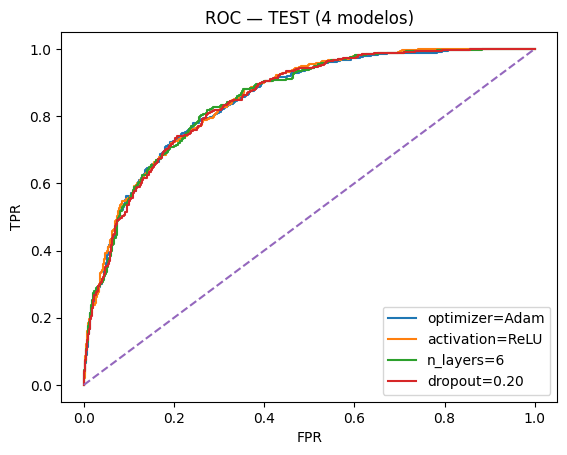

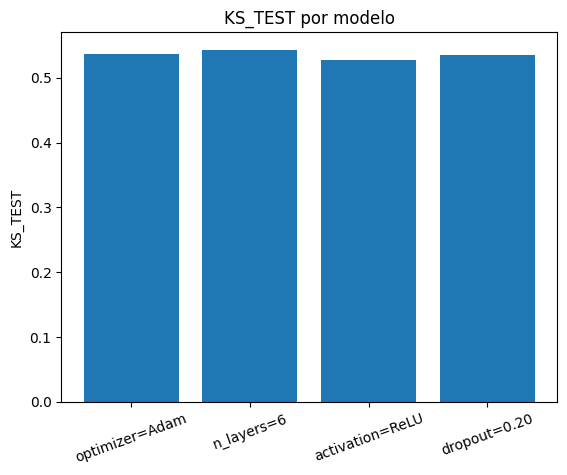

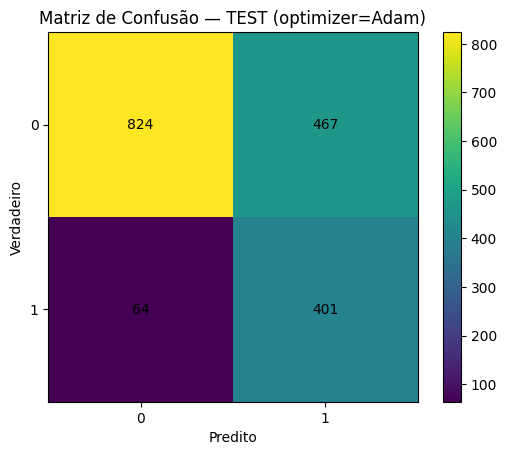

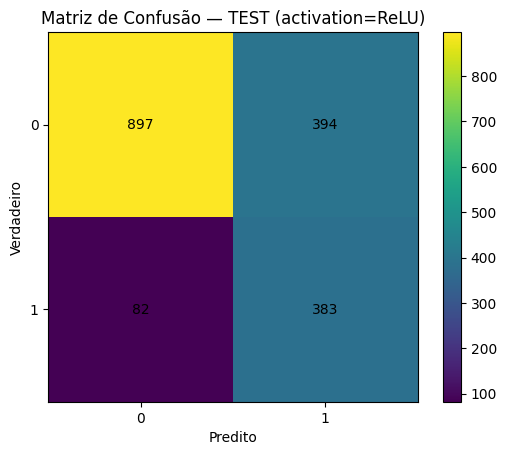

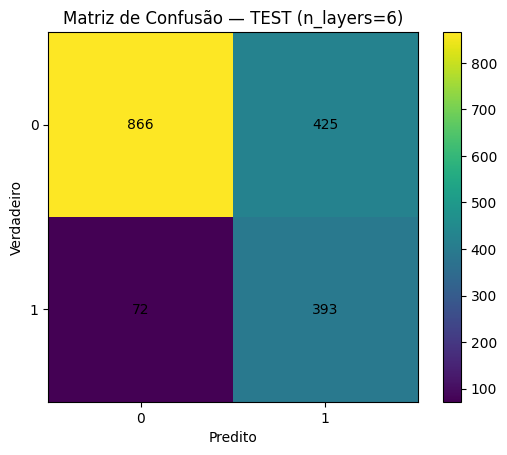

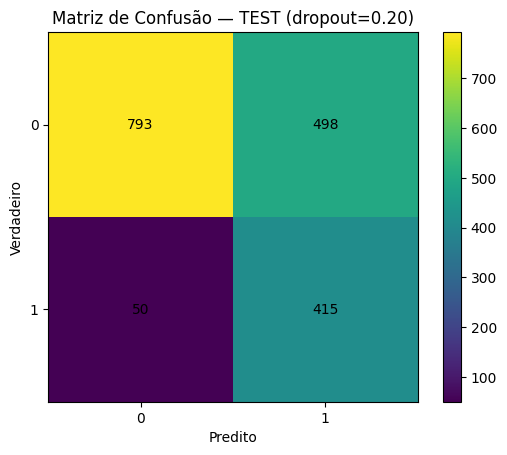

In [ ]:
# HOTFIX + 4 EXPERIMENTOS SELECIONADOS
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             classification_report, precision_recall_fscore_support,
                             log_loss, mean_squared_error)

# Pega sua classe de config e trainer disponíveis
CfgClass = globals().get("TrainConfig2", globals().get("TrainConfig"))
Trainer  = globals().get("train_and_eval_v2", globals().get("train_and_eval"))
assert CfgClass is not None and Trainer is not None, "Defina TrainConfig(2) e train_and_eval(_v2) antes."

# Base usada (só seta se o campo existir no seu dataclass)
BASE = dict(n_layers=4, d_model=128, n_heads=4, mlp_hidden=128,
            dropout=0.15, lr=1e-3, weight_decay=1e-4,
            optimizer="AdamW", transf_activation="gelu", head_activation="gelu",
            oversample=False, max_epochs=60, patience=10)

def build_cfg(changes: dict):
    cfg = CfgClass()
    for k,v in BASE.items():
        if hasattr(cfg, k): setattr(cfg, k, v)
    for k,v in changes.items():
        if hasattr(cfg, k): setattr(cfg, k, v)
    return cfg

def get_loaders():
    """Retorna (train_loader, val_loader, test_loader) sem criar variáveis locais
       com o mesmo nome usado no trainer (evita UnboundLocalError)."""
    if "make_loaders" in globals():
        tr, va, te = make_loaders()
        return tr, va, te
    # usa loaders globais criados no pré-processamento
    assert all(k in globals() for k in ["train_dl","val_dl","test_dl"]), \
        "Crie train_dl/val_dl/test_dl no seu pré-processamento."
    return globals()["train_dl"], globals()["val_dl"], globals()["test_dl"]

def predict_proba_safe(model, loader):
    if "predict_proba" in globals():
        return predict_proba(model, loader)
    # fallback (x_num, x_cat, y)
    import torch
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    preds, ys = [], []
    model.eval()
    with torch.no_grad():
        for xnum, xcat, y in loader:
            xnum = torch.as_tensor(xnum, dtype=torch.float32, device=device)
            xcat = torch.as_tensor(xcat, dtype=torch.long,    device=device)
            y    = torch.as_tensor(y,    dtype=torch.float32, device=device)
            p = torch.sigmoid(model(xnum, xcat))
            preds.append(p.detach().cpu().numpy()); ys.append(y.detach().cpu().numpy())
    return np.concatenate(preds), np.concatenate(ys)

def run_one(label, changes):
    print(f"\n=== {label} ===")
    cfg = build_cfg(changes)

    # Treino (v2 usa loaders internos; v1 usa os globais)
    if Trainer.__name__ == "train_and_eval_v2":
        model, rep = Trainer(cfg)[:2]
        _, val_loader, test_loader = get_loaders()
    else:
        assert all(k in globals() for k in ["train_dl","val_dl","test_dl","n_num","cat_cards"]), \
            "Crie train_dl/val_dl/test_dl e n_num/cat_cards antes."
        model, rep, _ = Trainer(train_dl, val_dl, test_dl, n_num, cat_cards, cfg)
        val_loader, test_loader = val_dl, test_dl

    thr = float(rep["thr"])

    # Probabilidades
    val_proba, val_y   = predict_proba_safe(model, val_loader)
    test_proba, test_y = predict_proba_safe(model, test_loader)

    # Métricas no TEST (threshold da VALIDAÇÃO)
    mse   = mean_squared_error(test_y, test_proba)
    ce    = log_loss(test_y, test_proba, labels=[0,1])
    auroc = roc_auc_score(test_y, test_proba)
    fpr, tpr, thr_vec = roc_curve(test_y, test_proba)
    ks    = float(np.max(np.abs(tpr - fpr)))
    y_pred = (test_proba >= thr).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(test_y, y_pred, average="binary", zero_division=0)
    cm = confusion_matrix(test_y, y_pred)

    print(f"Threshold (KS val): {thr:.4f}")
    print(f"MSE: {mse:.6f}")
    print(f"Cross-Entropy (Log Loss): {ce:.6f}")
    print(f"AUROC: {auroc:.4f}")
    print(f"KS Estatística: {ks:.4f}")
    print(f"Precisão: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")

    row = {
        "exp": label,
        "KS_VAL": rep["val"]["KS"], "KS_TEST": rep["test"]["KS"],
        "AUROC_VAL": rep["val"]["AUROC"], "AUROC_TEST": rep["test"]["AUROC"],
        "thr_used": thr,
        "MSE_TEST": mse, "LOGLOSS_TEST": ce,
        "Precision_TEST": prec, "Recall_TEST": rec, "F1_TEST": f1
    }
    return row, (fpr, tpr), cm

results, rocs, cms = [], {}, {}
row, roc, cm = run_one("optimizer=Adam", {"optimizer": "Adam"})
results.append(row); rocs["optimizer=Adam"] = roc; cms["optimizer=Adam"] = cm

row, roc, cm = run_one("activation=ReLU", {"transf_activation": "relu", "head_activation": "relu"})
results.append(row); rocs["activation=ReLU"] = roc; cms["activation=ReLU"] = cm

row, roc, cm = run_one("n_layers=6", {"n_layers": 6})
results.append(row); rocs["n_layers=6"] = roc; cms["n_layers=6"] = cm

row, roc, cm = run_one("dropout=0.20", {"dropout": 0.20})
results.append(row); rocs["dropout=0.20"] = roc; cms["dropout=0.20"] = cm

df_four = pd.DataFrame(results).sort_values("KS_VAL", ascending=False)
print("\n=== Tabela comparativa (ordenada por KS_VAL) ===")
display(df_four[
    ["exp","KS_VAL","KS_TEST","AUROC_VAL","AUROC_TEST",
     "MSE_TEST","LOGLOSS_TEST","Precision_TEST","Recall_TEST","F1_TEST","thr_used"]
])

# ---------- Gráficos comparativos ----------
# ROC sobrepostas (TEST)
plt.figure()
for label, (fpr, tpr) in rocs.items():
    plt.plot(fpr, tpr, label=label)
plt.plot([0,1],[0,1], linestyle="--")
plt.title("ROC — TEST (4 modelos)")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()

# KS_TEST barras
plt.figure()
plt.bar(df_four["exp"], df_four["KS_TEST"])
plt.title("KS_TEST por modelo")
plt.ylabel("KS_TEST"); plt.xticks(rotation=20); plt.show()

# Matrizes de confusão (TEST)
for label, cm in cms.items():
    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"Matriz de Confusão — TEST ({label})")
    plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
    plt.xticks([0,1],[0,1]); plt.yticks([0,1],[0,1])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center")
    plt.colorbar(); plt.show()

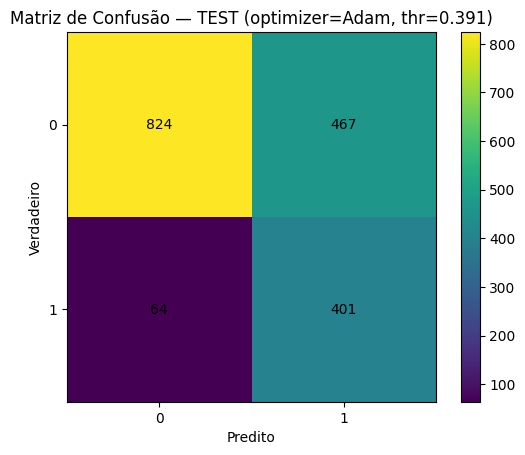

/tmp/ipython-input-2297544961.py:61: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auroc = np.trapz(tpr, fpr) * -1  # fpr geralmente crescente → área positiva


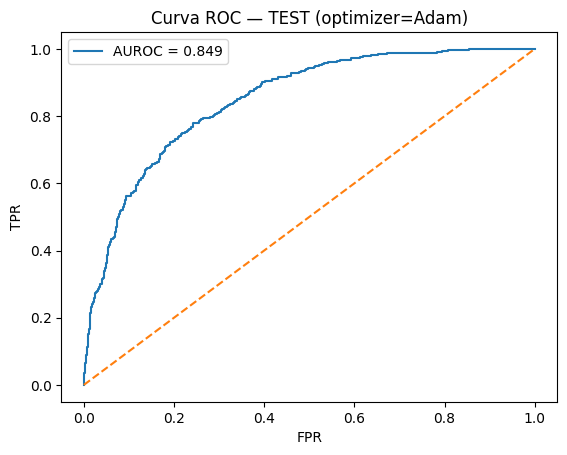

Aviso: não foi possível desenhar a Curva KS por threshold (faltam test_proba/test_y).


In [ ]:
# Gráficos do MODELO 1: optimizer=Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# --- Recupera probabilidades/labels do TEST ---
test_proba = test_y = None

# 1) tenta pegar da variável 'prob' (tupla do run_one)
if "prob" in globals() and isinstance(prob, (tuple, list)) and len(prob) == 2:
    test_proba, test_y = prob

# 2) se você tiver guardado num dicionário 'probs'
if test_proba is None and "probs" in globals() and "optimizer=Adam" in probs:
    test_proba, test_y = probs["optimizer=Adam"]

# 3) se não houver probs, ainda dá pra usar a curva ROC salva
use_saved_roc = False
if test_proba is None and "rocs" in globals() and "optimizer=Adam" in rocs:
    fpr_saved, tpr_saved = rocs["optimizer=Adam"]
    use_saved_roc = True

# --- Descobre o threshold usado na validação (da tabela df_four) ---
thr_val = None
if "df_four" in globals():
    try:
        thr_val = float(df_four.loc[df_four["exp"]=="optimizer=Adam","thr_used"].iloc[0])
    except Exception:
        pass

# --- 1) MATRIZ DE CONFUSÃO (TEST) ---
if "cms" in globals() and "optimizer=Adam" in cms:
    # se já tiver a matriz salva, plota direto
    cm = cms["optimizer=Adam"]
else:
    # senão, calcula (precisa de probs!)
    assert test_proba is not None, "Não encontrei as probabilidades do TEST para 'optimizer=Adam'. Re-execute o run do modelo ou me diga para recalcular."
    # se não achou thr_val, usa o melhor KS no TESTE como fallback
    fpr_tmp, tpr_tmp, thr_tmp = roc_curve(test_y, test_proba)
    ks_vals_tmp = tpr_tmp - fpr_tmp
    thr_star = thr_tmp[np.argmax(np.abs(ks_vals_tmp))]
    thr_plot = thr_val if thr_val is not None else thr_star
    cm = confusion_matrix(test_y, (test_proba >= thr_plot).astype(int))

plt.figure()
plt.imshow(cm, interpolation="nearest")
title_thr = f"{thr_val:.3f}" if thr_val is not None else "KS_test"
plt.title(f"Matriz de Confusão — TEST (optimizer=Adam, thr={title_thr})")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.xticks([0,1],[0,1]); plt.yticks([0,1],[0,1])
for i in range(2):
    for j in range(2):
        plt.text(j, i, int(cm[i, j]), ha="center", va="center")
plt.colorbar()
plt.show()

# --- 2) CURVA ROC (TEST) ---
if use_saved_roc:
    fpr, tpr = fpr_saved, tpr_saved
    # AUROC aproximado pela regra do trapézio (se não tivermos probs)
    auroc = np.trapz(tpr, fpr) * -1  # fpr geralmente crescente → área positiva
    auroc = abs(auroc)
else:
    fpr, tpr, thr_vec = roc_curve(test_y, test_proba)
    auroc = roc_auc_score(test_y, test_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Curva ROC — TEST (optimizer=Adam)")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend()
plt.show()

# --- 3) CURVA KS (TEST) — requer probs para ter 'threshold' ---
if test_proba is not None:
    fpr, tpr, thr_vec = roc_curve(test_y, test_proba)
    sep = tpr - fpr
    i_star = np.argmax(np.abs(sep))
    plt.figure()
    plt.plot(thr_vec, tpr, label="TPR")
    plt.plot(thr_vec, fpr, label="FPR")
    plt.plot(thr_vec, sep, label="TPR−FPR (KS)")
    # marca o melhor KS no teste
    plt.axvline(thr_vec[i_star], linestyle="--", label=f"KS={np.abs(sep[i_star]):.3f} @thr={thr_vec[i_star]:.3f}")
    # marca o thr da validação (se disponível)
    if thr_val is not None:
        plt.axvline(thr_val, color="k", linestyle=":", label=f"thr_val={thr_val:.3f}")
    plt.gca().invert_xaxis()  # thresholds do roc_curve vêm decrescentes
    plt.title("Curva KS — TEST (optimizer=Adam)")
    plt.xlabel("Threshold"); plt.ylabel("Taxa"); plt.legend()
    plt.show()
else:
    print("Aviso: não foi possível desenhar a Curva KS por threshold (faltam test_proba/test_y).")

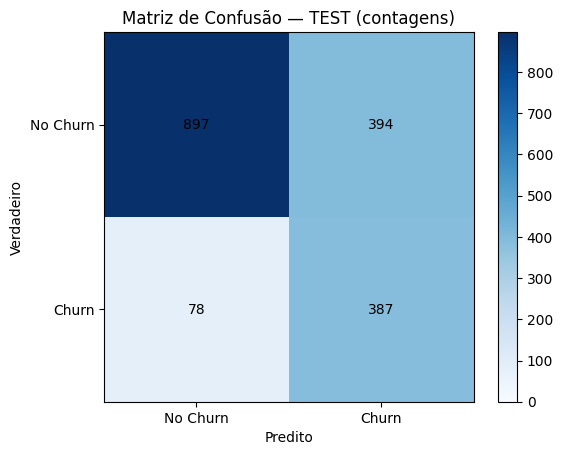

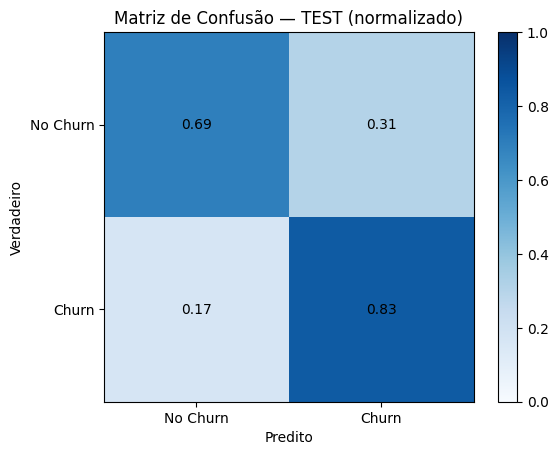

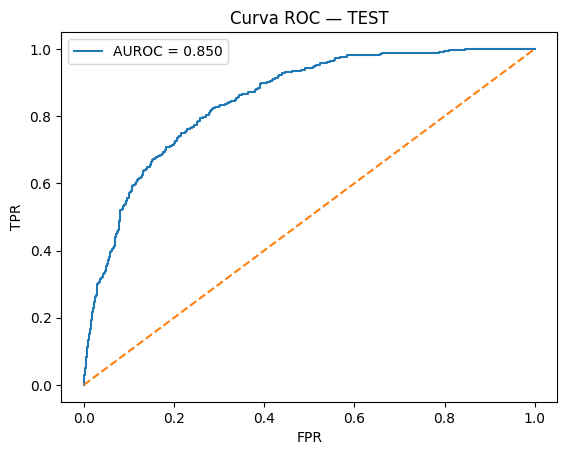

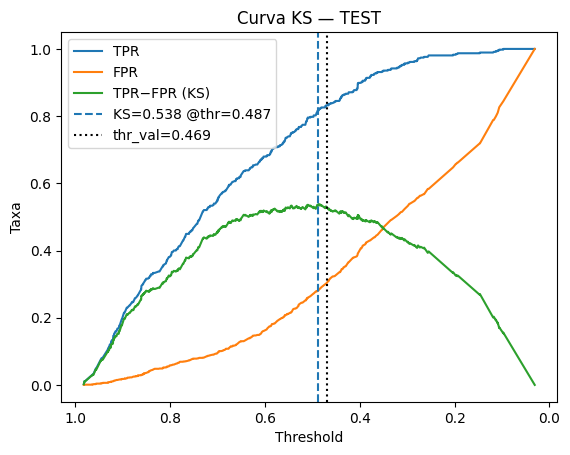

In [ ]:
# Recalcula probs do TEST e plota CM/ROC/KS (sem treinar)
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# 1) Recupera loaders
if "make_loaders" in globals():
    _, val_dl, test_dl = make_loaders()
else:
    assert "val_dl" in globals() and "test_dl" in globals(), "Crie val_dl/test_dl no pré-processamento."

# 2) Escolhe o modelo disponível (final_model > model)
mdl = globals().get("final_model") or globals().get("model")
assert mdl is not None, "Nenhum modelo na RAM. Carregue checkpoint (.pt) ou rode o treino do modelo escolhido."

# 3) Funções auxiliares (fallback caso não existam)
def _predict_proba(m, dl):
    if "predict_proba" in globals(): return predict_proba(m, dl)
    import torch
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    m.eval(); ps, ys = [], []
    with torch.no_grad():
        for xnum, xcat, y in dl:
            xnum = torch.as_tensor(xnum, dtype=torch.float32, device=device)
            xcat = torch.as_tensor(xcat, dtype=torch.long,    device=device)
            y    = torch.as_tensor(y,    dtype=torch.float32, device=device)
            ps.append(torch.sigmoid(m(xnum, xcat)).cpu().numpy()); ys.append(y.cpu().numpy())
    return np.concatenate(ps), np.concatenate(ys)

def _ks_thr(y, p):
    fpr, tpr, thr = roc_curve(y, p); sep = tpr - fpr
    return float(thr[np.argmax(np.abs(sep))])

# 4) Probabilidades e threshold (usa thr salvo; senão, KS na VAL)
val_proba, val_y   = _predict_proba(mdl, val_dl)
test_proba, test_y = _predict_proba(mdl, test_dl)
thr = float(globals().get("final_report", {}).get("thr", _ks_thr(val_y, val_proba)))

# 5) Matriz de confusão (contagens e normalizada)
y_pred = (test_proba >= thr).astype(int)
cm = confusion_matrix(test_y, y_pred)
cmn = confusion_matrix(test_y, y_pred, normalize="true")

def _plot_cm(mat, norm=False, title=""):
    vmin, vmax = (0,1) if norm else (0, mat.max())
    plt.imshow(mat, cmap="Blues", vmin=vmin, vmax=vmax)
    plt.title(title + (" (normalizado)" if norm else " (contagens)"))
    plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
    plt.xticks([0,1], ["No Churn","Churn"]); plt.yticks([0,1], ["No Churn","Churn"])
    for i in range(2):
        for j in range(2):
            txt = f"{mat[i,j]:.2f}" if norm else f"{int(mat[i,j])}"
            plt.text(j, i, txt, ha="center", va="center")
    plt.colorbar(); plt.show()

_plot_cm(cm,  norm=False, title="Matriz de Confusão — TEST")
_plot_cm(cmn, norm=True,  title="Matriz de Confusão — TEST")

# 6) Curva ROC
fpr, tpr, thr_vec = roc_curve(test_y, test_proba)
auroc = roc_auc_score(test_y, test_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.title("Curva ROC — TEST")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()

# 7) Curva KS (TPR, FPR e TPR−FPR vs threshold)
sep = tpr - fpr; i = np.argmax(np.abs(sep))
plt.figure()
plt.plot(thr_vec, tpr, label="TPR"); plt.plot(thr_vec, fpr, label="FPR"); plt.plot(thr_vec, sep, label="TPR−FPR (KS)")
plt.axvline(thr_vec[i], linestyle="--", label=f"KS={np.abs(sep[i]):.3f} @thr={thr_vec[i]:.3f}")
plt.axvline(thr, color="k", linestyle=":", label=f"thr_val={thr:.3f}")
plt.gca().invert_xaxis()
plt.title("Curva KS — TEST")
plt.xlabel("Threshold"); plt.ylabel("Taxa"); plt.legend(); plt.show()

## XGBoost

#### Link para notebook completo -> https://github.com/Edu-p/nn-exps/blob/main/notebooks/F_PROJ/smote_optuna

In [ ]:


def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna(subset=['TotalCharges'])
    if 'SeniorCitizen' in df.columns:
        df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
    return df


def define_feature_sets(df: pd.DataFrame) -> Tuple[list, list]:
    categorical_columns = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'
    ]
    numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
    missing_cat = [c for c in categorical_columns if c not in df.columns]
    missing_num = [c for c in numeric_columns if c not in df.columns]
    if missing_cat or missing_num:
        raise ValueError(f"Colunas ausentes no dataset. Categóricas faltando: {missing_cat}; Numéricas faltando: {missing_num}")
    return categorical_columns, numeric_columns


def create_preprocessor(categorical_columns, numeric_columns) -> ColumnTransformer:
    return ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_columns),
            ('num', StandardScaler(), numeric_columns)
        ]
    )


def calculate_ks_statistic(y_true: np.ndarray, y_proba: np.ndarray):
    class_0_proba = y_proba[y_true == 0]
    class_1_proba = y_proba[y_true == 1]
    ks_stat, p_value = stats.ks_2samp(class_0_proba, class_1_proba)
    return ks_stat, p_value


def compute_metrics(model, X, y, dataset_name='dataset') -> Dict[str, Any]:
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_probs)
    ce = log_loss(y, y_probs)
    cm = confusion_matrix(y, y_pred)
    auroc = roc_auc_score(y, y_probs)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    ks_stat, ks_pvalue = calculate_ks_statistic(y, y_probs)

    print(f"--- Métricas para {dataset_name} ---")
    print(f"MSE: {mse:.4f}")
    print(f"Cross-Entropy (Log Loss): {ce:.4f}")
    print(f"AUROC: {auroc:.4f}")
    print(f"KS Estatística: {ks_stat:.4f} (p-valor: {ks_pvalue:.4f})")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(cm)
    print(classification_report(y, y_pred, digits=4))

    return {
        'mse': mse,
        'cross_entropy': ce,
        'auroc': auroc,
        'ks_stat': ks_stat,
        'ks_p_value': ks_pvalue,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }


def plot_evaluations(model, X, y, dataset_name='Dataset'):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    fpr, tpr, _ = roc_curve(y, y_probs)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y, y_probs):.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'Curva ROC - {dataset_name}')
    plt.legend(); plt.grid(True); plt.show()

    prec, rec, _ = precision_recall_curve(y, y_probs)
    plt.figure(figsize=(6, 5))
    plt.plot(rec, prec, label='Precision-Recall')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'Curva PR - {dataset_name}')
    plt.legend(); plt.grid(True); plt.show()

    probs_0 = y_probs[y == 0]; probs_1 = y_probs[y == 1]
    all_probs = np.sort(np.concatenate([probs_0, probs_1]))
    cdf_0 = np.searchsorted(probs_0, all_probs, side='right') / len(probs_0)
    cdf_1 = np.searchsorted(probs_1, all_probs, side='right') / len(probs_1)
    ks_statistic = np.max(np.abs(cdf_0 - cdf_1))
    plt.figure(figsize=(6, 5))
    plt.plot(all_probs, cdf_0, label='CDF Classe 0')
    plt.plot(all_probs, cdf_1, label='CDF Classe 1')
    plt.vlines(all_probs[np.argmax(np.abs(cdf_0 - cdf_1))], ymin=min(cdf_0), ymax=max(cdf_1),
               colors='red', linestyles='dashed', label=f'KS = {ks_statistic:.3f}')
    plt.xlabel('Probabilidades'); plt.ylabel('CDF'); plt.title(f'Curva KS - {dataset_name}')
    plt.legend(); plt.grid(True); plt.show()

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Real'); plt.xlabel('Predito'); plt.title(f'Matriz de Confusão - {dataset_name}')
    plt.show()


def make_pipeline(preprocessor: ColumnTransformer, trial: optuna.trial.Trial) -> ImbPipeline:
    xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 100, 1000, step=50)
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 3, 12)
    xgb_learning_rate = trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True)
    xgb_subsample = trial.suggest_float('xgb_subsample', 0.5, 1.0)
    xgb_colsample_bytree = trial.suggest_float('xgb_colsample_bytree', 0.5, 1.0)
    xgb_gamma = trial.suggest_float('xgb_gamma', 0.0, 5.0)

    classifier = xgb.XGBClassifier(
        n_estimators=xgb_n_estimators,
        max_depth=xgb_max_depth,
        learning_rate=xgb_learning_rate,
        subsample=xgb_subsample,
        colsample_bytree=xgb_colsample_bytree,
        gamma=xgb_gamma,
        eval_metric='logloss',
        tree_method='hist',
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    smote_k = trial.suggest_int('smote_k_neighbors', 3, 10)

    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=RANDOM_STATE, k_neighbors=smote_k)),
        ('classifier', classifier)
    ])
    return pipe


def tune_with_optuna(X_train: pd.DataFrame, y_train: pd.Series,
                     preprocessor: ColumnTransformer,
                     n_trials: int = 40, cv_splits: int = 5,
                     timeout: int | None = None) -> Tuple[ImbPipeline, optuna.Study]:
    def objective(trial: optuna.trial.Trial) -> float:
        pipeline = make_pipeline(preprocessor, trial)
        cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=RANDOM_STATE)
        scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
        return float(np.mean(scores))

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, timeout=timeout, show_progress_bar=True)

    print("Melhores parâmetros (Optuna):", study.best_trial.params)
    best_trial = study.best_trial
    best_pipeline = make_pipeline(preprocessor, best_trial)
    best_pipeline.fit(X_train, y_train)

    return best_pipeline, study


def shap_summary_for_model(pipeline: ImbPipeline,
                           X_reference: pd.DataFrame,
                           categorical_columns: list,
                           numeric_columns: list,
                           max_background: int = 800,
                           max_display: int = 20):
    if not _HAS_SHAP:
        print("SHAP não está instalado. Instale com: pip install shap")
        return

    preprocessor: ColumnTransformer = pipeline.named_steps['preprocessor']
    clf = pipeline.named_steps['classifier']

    ohe: OneHotEncoder = preprocessor.named_transformers_['cat']
    ohe_feature_names = list(ohe.get_feature_names_out(categorical_columns))
    feature_names = ohe_feature_names + numeric_columns

    X_proc = preprocessor.transform(X_reference)
    if isinstance(X_proc, np.ndarray):
        X_proc_df = pd.DataFrame(X_proc, columns=feature_names)
    else:
        X_proc_df = pd.DataFrame(X_proc.toarray(), columns=feature_names)

    if len(X_proc_df) > max_background:
        X_bg = X_proc_df.sample(n=max_background, random_state=RANDOM_STATE)
    else:
        X_bg = X_proc_df

    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_bg)

    plt.figure()
    try:
        shap.summary_plot(shap_values[1] if isinstance(shap_values, list) else shap_values,
                          X_bg, feature_names=feature_names, show=False, max_display=max_display)
    except Exception:
        shap.summary_plot(shap_values, X_bg, feature_names=feature_names, show=False, max_display=max_display)
    plt.title('SHAP Summary (Validação)')
    plt.show()

    plt.figure()
    try:
        shap.summary_plot(shap_values[1] if isinstance(shap_values, list) else shap_values,
                          X_bg, feature_names=feature_names, show=False, plot_type='bar', max_display=max_display)
    except Exception:
        shap.summary_plot(shap_values, X_bg, feature_names=feature_names, show=False, plot_type='bar', max_display=max_display)
    plt.title('SHAP Feature Importance (Bar)')
    plt.show()


In [ ]:
df_t = pd.read_csv("../_data/customer_churn_telecom_services.csv")
display(df_t.head)
display(df_t.shape)
display(df_t.columns)

In [ ]:

def main(file_path: str | None = None,
         n_trials: int | None = None,
         cv_splits: int = 5) -> Dict[str, Any]:
    print("INICIANDO PIPELINE COM SMOTE + OPTUNA + SHAP")
    print("=" * 80)

    if file_path is None:
        candidates = [
            '../_data/customer_churn_telecom_services.csv',
            '../../_data/customer_churn_telecom_services.csv',
            '../../../_data/customer_churn_telecom_services.csv',
            'notebooks/_data/customer_churn_telecom_services.csv',
            '_data/customer_churn_telecom_services.csv'
        ]
        for c in candidates:
            if os.path.exists(c):
                file_path = c
                break
        if file_path is None:
            file_path = '../_data/customer_churn_telecom_services.csv'

    df = load_and_preprocess_data(file_path)
    if set(df['Churn'].unique()) == {'Yes', 'No'}:
        y = df['Churn'].map({'No': 0, 'Yes': 1})
    else:
        y = df['Churn']
    categorical_columns, numeric_columns = define_feature_sets(df)
    X = df.drop(columns='Churn')

    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.20, random_state=RANDOM_STATE, stratify=y_temp
    )
    print("\nTamanhos dos conjuntos:")
    print(f"Treino: {X_train.shape[0]} | Validação: {X_val.shape[0]} | Teste: {X_test.shape[0]}")
    print(f"Distribuição no treino: {y_train.value_counts().to_dict()}")
    print(f"Distribuição na validação: {y_val.value_counts().to_dict()}")
    print(f"Distribuição no teste: {y_test.value_counts().to_dict()}")

    preprocessor = create_preprocessor(categorical_columns, numeric_columns)

    if n_trials is None:
        n_trials = int(os.getenv("OPTUNA_TRIALS", "40"))

    print(f"\nOtimizando hiperparâmetros com Optuna (n_trials={n_trials}, cv={cv_splits})...")
    best_pipeline, study = tune_with_optuna(
        X_train=X_train, y_train=y_train, preprocessor=preprocessor,
        n_trials=n_trials, cv_splits=cv_splits
    )

    print("\nAvaliação no conjunto de Validação:")
    val_metrics = compute_metrics(best_pipeline, X_val, y_val, dataset_name='Validação')
    plot_evaluations(best_pipeline, X_val, y_val, dataset_name='Validação')

    print("\nAvaliação no conjunto de Teste:")
    test_metrics = compute_metrics(best_pipeline, X_test, y_test, dataset_name='Teste')
    plot_evaluations(best_pipeline, X_test, y_test, dataset_name='Teste')

    print("\nGerando explicações SHAP no conjunto de Validação...")
    shap_summary_for_model(
        best_pipeline, X_val,
        categorical_columns=categorical_columns,
        numeric_columns=numeric_columns,
        max_background=800, max_display=20
    )

    print("\nPIPELINE CONCLUÍDO!")
    return {
        'pipeline': best_pipeline,
        'optuna_study': study,
        'val_metrics': val_metrics,
        'test_metrics': test_metrics,
        'splits': (X_train, y_train, X_val, y_val, X_test, y_test),
        'features': {
            'categorical': categorical_columns,
            'numeric': numeric_columns
        }
    }


In [ ]:
if __name__ == "__main__":
    _ = main()

## TabPFNv2 Transformer

In [ ]:
# GPU

import torch
print("PyTorch CUDA disponível:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "cpu")

PyTorch CUDA disponível: True
Device: Tesla T4


In [ ]:
# Métricas

def ks_stat(y_true, probs):
    df = pd.DataFrame({"y": y_true, "p": probs})
    df = df.sort_values("p")
    df['cum_pos'] = (df['y']==1).cumsum() / (df['y']==1).sum()
    df['cum_neg'] = (df['y']==0).cumsum() / (df['y']==0).sum()
    ks = (df['cum_pos'] - df['cum_neg']).abs().max()
    return ks

def avaliar_modelo(y_true, probs, preds):
    print("=== Métricas ===")
    print("Kolmogorov-Smirnov (KS):", ks_stat(y_true, probs))
    print("MSE:", mean_squared_error(y_true, probs))
    print("Entropia Cruzada (LogLoss):", log_loss(y_true, probs))
    print("AUROC:", roc_auc_score(y_true, probs))
    print("Precision:", precision_score(y_true, preds))
    print("Recall:", recall_score(y_true, preds))
    print("F1-score:", f1_score(y_true, preds))
    print("Matriz de confusão:\n", confusion_matrix(y_true, preds))

def plotar_graficos(y_true, probs, preds):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) Curva ROC
    fpr, tpr, _ = roc_curve(y_true, probs)
    axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_true, probs):.4f}')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_xlabel('FPR')
    axes[0].set_ylabel('TPR')
    axes[0].set_title('Curva ROC')
    axes[0].legend()

    # 2) Curva KS
    df = pd.DataFrame({"y": y_true, "p": probs}).sort_values("p")
    df['cum_pos'] = (df['y']==1).cumsum() / (df['y']==1).sum()
    df['cum_neg'] = (df['y']==0).cumsum() / (df['y']==0).sum()
    axes[1].plot(df['cum_pos'].values, label='Positivos acumulados')
    axes[1].plot(df['cum_neg'].values, label='Negativos acumulados')
    ks_value = (df['cum_pos'] - df['cum_neg']).abs().max()
    axes[1].set_title(f'Curva KS (valor={ks_value:.4f})')
    axes[1].legend()

    # 3) Matriz de confusão
    ConfusionMatrixDisplay.from_predictions(y_true, preds, ax=axes[2], cmap='Blues')
    axes[2].set_title('Matriz de Confusão')

    plt.tight_layout()
    plt.show()

#### Performance base

In [ ]:
clf = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu', random_state=42) # Instanciando o classificador

clf.fit(X_train, y_train) # Ajustando o classificador ao conjunto de treino

# Predições
probs = clf.predict_proba(X_val)[:, 1]   # Probabilidades da classe 1 (conjunto de validação)
preds = (probs >= 0.5).astype(int)

In [ ]:
# Métricas (conjunto de validação)
avaliar_modelo(y_val, probs, preds)

=== Métricas ===
Kolmogorov-Smirnov (KS): 0.546777758487139
MSE: 0.1353294402360916
Entropia Cruzada (LogLoss): 0.4136725744177204
AUROC: 0.848929258260103
Precision: 0.6602739726027397
Recall: 0.5193965517241379
F1-score: 0.5814234016887817
Matriz de confusão:
 [[1167  124]
 [ 223  241]]


In [ ]:
# Predições
probs = clf.predict_proba(X_test)[:, 1]   # Probabilidades da classe 1 (conjunto de teste)
preds = (probs >= 0.5).astype(int)

In [ ]:
# Métricas (conjunto de teste)
avaliar_modelo(y_test, probs, preds)

=== Métricas ===
Kolmogorov-Smirnov (KS): 0.5608855350940756
MSE: 0.13103817403316498
Entropia Cruzada (LogLoss): 0.4018188479379148
AUROC: 0.8565244913087297
Precision: 0.6638655462184874
Recall: 0.5096774193548387
F1-score: 0.5766423357664233
Matriz de confusão:
 [[1171  120]
 [ 228  237]]


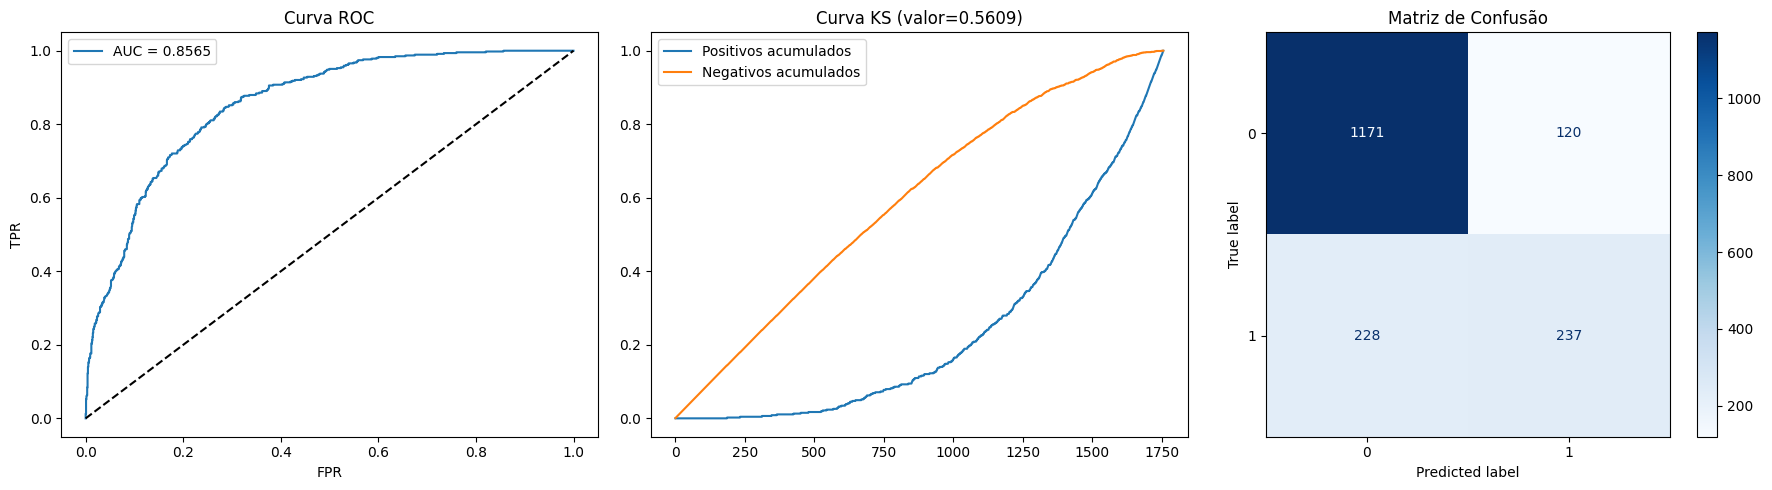

In [ ]:
# Plotar gráficos (conjunto de teste)
plotar_graficos(y_test, probs, preds)

#### Experimento 1: Parâmetros

Este experimento consiste em testar como os parâmetros `n_estimators` e `softmax_temperature` afetam a performance geral. O TabPFN não é um modelo que possui muitos parâmetros para a otimização, porque em essência não precisa de tuning de hiperparâmetros (https://arxiv.org/abs/2207.01848)

Mesmo assim, na biblioteca do modelo há alguns parâmetros. A maior parte está associada a velocidade de execução, mas há o `n_estimators` e a `softmax_temperature` que podem ter alguma influência nos resultados - e portanto, testá-los é o objetivo deste experimento. O tempo de execução não foi uma limitação nesse modelo para este dataset (como esperado).

- `n_estimators` refere-se a quantos forward passes o modelo realiza, cada uma com dados de entrada um pouco diferentes. As previsões dessas passagens são combinadas, criando efetivamente um conjunto (ensemble) de n_estimators “versões” diferentes dos dados de entrada, o que pode ajudar a melhorar a predição final.

- `softmax_temperature` é a temperatura para a softmax, que se usa para controlar a confiança das previsões do modelo. Valores mais baixos tornam as previsões do modelo mais confiantes

In [ ]:
clf = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu', random_state=42, n_estimators=16, softmax_temperature=0.7) # Instanciando o classificador

clf.fit(X_train, y_train) # Ajustando o classificador ao conjunto de treino

# Predições
probs = clf.predict_proba(X_val)[:, 1]   # Probabilidades da classe 1 (conjunto de validação)
preds = (probs >= 0.5).astype(int)

In [ ]:
# Métricas (conjunto de validação)
avaliar_modelo(y_val, probs, preds)

=== Métricas ===
Kolmogorov-Smirnov (KS): 0.544216926199952
MSE: 0.13821355998516083
Entropia Cruzada (LogLoss): 0.42778875395991706
AUROC: 0.84890004407169
Precision: 0.6798866855524079
Recall: 0.5172413793103449
F1-score: 0.587515299877601
Matriz de confusão:
 [[1178  113]
 [ 224  240]]


In [ ]:
scalers = {
    "none": None
}

def objective(trial):
    # --- 1. Choose hyperparameters ---
    scaler_name = trial.suggest_categorical("scaler", list(scalers.keys()))
    n_estimators = trial.suggest_int("n_estimators", 8, 64)
    softmax_temperature = trial.suggest_float("softmax_temperature", 0.1, 2.0)

    # --- 2. Preprocess ---
    if scaler_name != "none":
        scaler = scalers[scaler_name]
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
    else:
        X_train_scaled, X_val_scaled = X_train, X_val

    # --- 3. Fit TabPFNv2 ---
    clf = TabPFNClassifier(
        device='cuda' if torch.cuda.is_available() else 'cpu',
        n_estimators=n_estimators,
        softmax_temperature=softmax_temperature
    )
    clf.fit(X_train_scaled, y_train)

    # --- 4. Predict & score ---
    probs_val = clf.predict_proba(X_val_scaled)[:, 1]
    preds_val = (probs_val >= 0.5).astype(int)

    score = ks_stat(y_val, probs_val)
    return score  # maximize KS

# --- 5. Run Optuna ---
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best params:", study.best_params)
print("Best KS:", study.best_value)

[I 2025-08-11 08:35:20,273] A new study created in memory with name: no-name-a259accb-20d8-4cc8-b450-ece39aa641c1
[I 2025-08-11 08:35:38,148] Trial 0 finished with value: 0.5470148107588344 and parameters: {'scaler': 'none', 'n_estimators': 34, 'softmax_temperature': 1.5944626376570494}. Best is trial 0 with value: 0.5470148107588344.
[I 2025-08-11 08:35:50,807] Trial 1 finished with value: 0.5444222602099416 and parameters: {'scaler': 'none', 'n_estimators': 22, 'softmax_temperature': 0.8263621725877348}. Best is trial 0 with value: 0.5470148107588344.
[I 2025-08-11 08:36:15,496] Trial 2 finished with value: 0.5456342316835385 and parameters: {'scaler': 'none', 'n_estimators': 44, 'softmax_temperature': 1.2606319371242707}. Best is trial 0 with value: 0.5470148107588344.
[I 2025-08-11 08:36:32,558] Trial 3 finished with value: 0.5474521888939341 and parameters: {'scaler': 'none', 'n_estimators': 31, 'softmax_temperature': 1.922431895131958}. Best is trial 3 with value: 0.5474521888939

Best params: {'scaler': 'none', 'n_estimators': 53, 'softmax_temperature': 1.567768773788246}
Best KS: 0.5498444135794225


In [ ]:
clf = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu', random_state=42, n_estimators=53, softmax_temperature=1.5678) # Instanciando o classificador

clf.fit(X_train, y_train) # Ajustando o classificador ao conjunto de treino

# Predições
probs = clf.predict_proba(X_val)[:, 1]   # Probabilidades da classe 1 (conjunto de validação)
preds = (probs >= 0.5).astype(int)

In [ ]:
# Métricas (conjunto de validação)
avaliar_modelo(y_val, probs, preds)

=== Métricas ===
Kolmogorov-Smirnov (KS): 0.5452602900718502
MSE: 0.13974826037883759
Entropia Cruzada (LogLoss): 0.43499572331555075
AUROC: 0.849085345495339
Precision: 0.6611111111111111
Recall: 0.5129310344827587
F1-score: 0.5776699029126213
Matriz de confusão:
 [[1169  122]
 [ 226  238]]


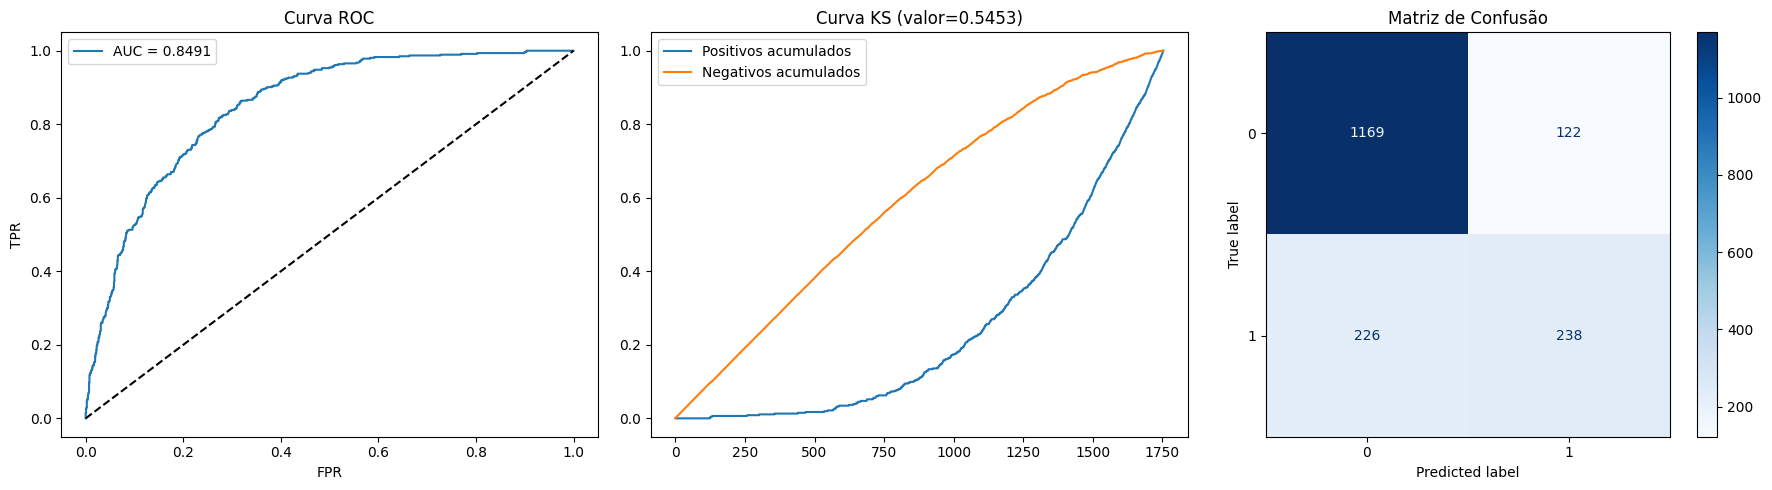

In [ ]:
# Plotar gráficos (conjunto de validação)
plotar_graficos(y_val, probs, preds)

#### Experimento 2

O objetivo deste experimento é testar particionamentos diferentes nos dados.

Observação: As células deste experimento foram executadas várias vezes com vários valores de partição para treino, teste e validação. Apenas o melhor resultado foi mantido no código, mas outros valores foram testados.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

In [ ]:
print("\nTamanhos dos conjuntos:")
print(f"Treino: {X_train.shape[0]} | Validação: {X_val.shape[0]} | Teste: {X_test.shape[0]}")
print(f"Distribuição no treino: {y_train.value_counts().to_dict()}")
print(f"Distribuição na validação: {y_val.value_counts().to_dict()}")
print(f"Distribuição no teste: {y_test.value_counts().to_dict()}")


Tamanhos dos conjuntos:
Treino: 4563 | Validação: 983 | Teste: 1475
Distribuição no treino: {0: 3356, 1: 1207}
Distribuição na validação: {0: 723, 1: 260}
Distribuição no teste: {0: 1085, 1: 390}


In [ ]:
clf = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu', random_state=42, n_estimators=53, softmax_temperature=1.5678) # Instanciando o classificador

clf.fit(X_train, y_train) # Ajustando o classificador ao conjunto de treino

# Predições
probs = clf.predict_proba(X_val)[:, 1]   # Probabilidades da classe 1 (conjunto de validação)
preds = (probs >= 0.5).astype(int)

In [ ]:
# Métricas
avaliar_modelo(y_val, probs, preds)

=== Métricas ===
Kolmogorov-Smirnov (KS): 0.6174646238961592
MSE: 0.12748514115810394
Entropia Cruzada (LogLoss): 0.40415324704695005
AUROC: 0.8842456644323865
Precision: 0.7085427135678392
Recall: 0.5423076923076923
F1-score: 0.6143790849673203
Matriz de confusão:
 [[665  58]
 [119 141]]


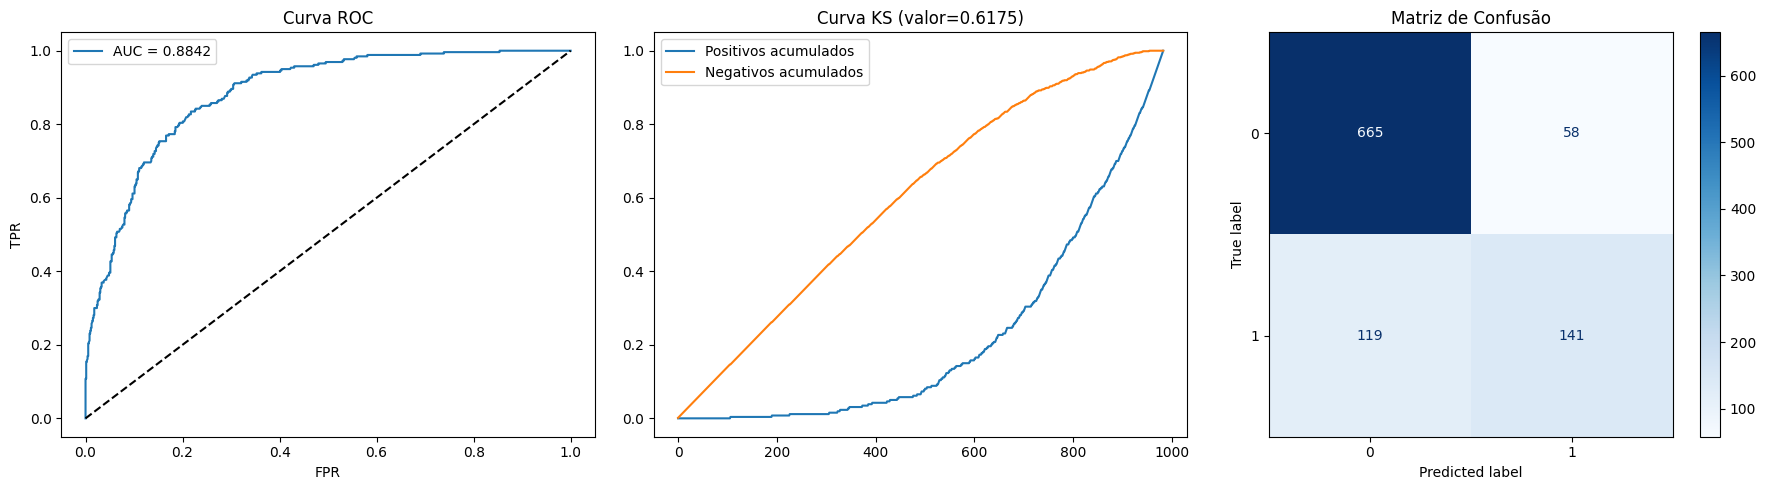

In [ ]:
# Plotar gráficos (conjunto de validação)
plotar_graficos(y_val, probs, preds)

#### Resultado final no conjunto de testes

In [ ]:
# Predições
probs = clf.predict_proba(X_test)[:, 1]   # Probabilidades da classe 1 (conjunto de teste)
preds = (probs >= 0.5).astype(int)

In [ ]:
# Métricas
avaliar_modelo(y_test, probs, preds)

=== Métricas ===
Kolmogorov-Smirnov (KS): 0.5316318090511638
MSE: 0.14032664895057678
Entropia Cruzada (LogLoss): 0.4360878078156973
AUROC: 0.8423348694316437
Precision: 0.6677966101694915
Recall: 0.5051282051282051
F1-score: 0.5751824817518248
Matriz de confusão:
 [[987  98]
 [193 197]]


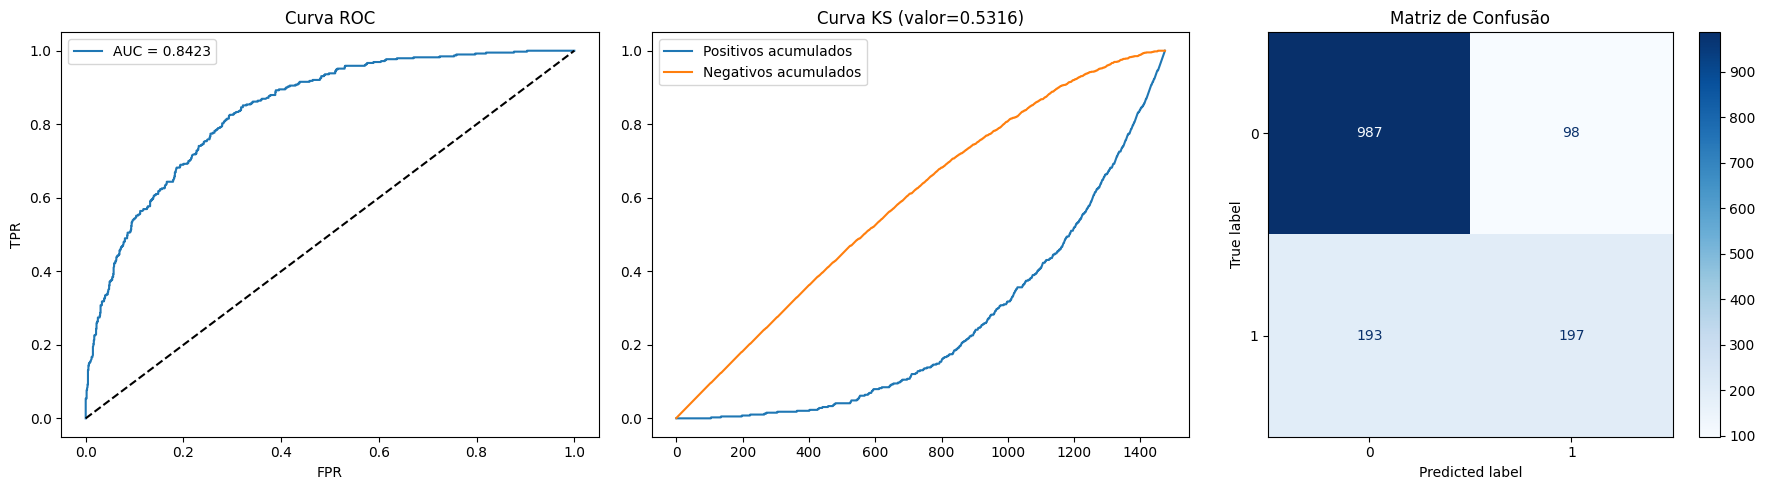

In [ ]:
# Plotar gráficos
plotar_graficos(y_test, probs, preds)

Podemos concluir com a experimentação que, ainda que tenha sido realizada a tentativa de otimização nos parâmetros com base no conjunto de validação, os resultados iniciais no conjunto de teste foram melhores.

# Conclusão


Como conclusão comparativa de performance dos modelos temos que o TabPFNv2 foi o que teve a melhor métrica de KS, com os outros modelos mantendo uma média de 0.53.\
Levando em consideração o F1-Score, temos que o Random Forest teve o melhor resultado, o que indica um bom equilíbrio entre o Recall e o Precision, apesar disso, os outros modelos mantiveram uma boa performance dessa métrica.\
Já em relação a curva AUC-ROC, temos que o TabPFNv2 também foi o que melhor apresentou resultados, embora todos os outros modelos tenham mantido uma média semelhante.

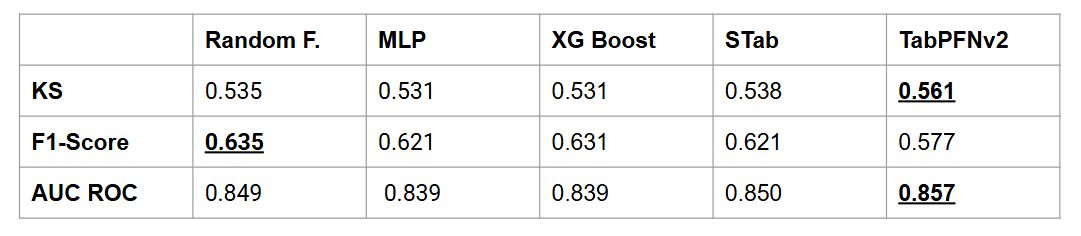